# Necessary Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from datetime import datetime as dt
import random


import os
import math
import json

plt.rcParams['figure.figsize'] = (20, 10)


from sklearn.model_selection import GridSearchCV


import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
%matplotlib inline
import sklearn
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler

# Code for Extracting Features of Sounds

In [ ]:
# Sampling rate.
sr = 22050
# Let’s make sure all files have the same amount of samples, pick a duration right under 30 seconds.
TOTAL_SAMPLES = 1 * sr
# The dataset contains 999 files (1000–1 defective). Lets make it bigger.
# X amount of slices => X times more training examples.
NUM_SLICES = 1
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)


DATASET_PATH = "your file path"
json_path="json file name"


mydict = {
        "labels": [],"mfcc_mean_20": [],"mfcc_var_20": [],"spectral_centroids_mean": [],"spectral_centroids_var": [],
    "chromagram_mean": [],"chromagram_var": [],"tempo": [],
"zero_crossings_mean": [],"zero_crossings_var": [],"y_harm_mean": [],"y_harm_var": [],"y_perc_mean": [],"y_perc_var": [],
"rollof_mean": [],"rollof_var": [],"rms_mean": [],"rms_var": [],"mfcc_mean_1": [],"mfcc_mean_2": [],"mfcc_mean_3": []
,"mfcc_mean_4": [],"mfcc_mean_5": [],"mfcc_mean_6": [],"mfcc_mean_7": [],"mfcc_mean_8": [],"mfcc_mean_9": []
,"mfcc_mean_10": [],"mfcc_mean_11": [],"mfcc_mean_12": [],"mfcc_mean_13": [],"mfcc_mean_14": [],"mfcc_mean_15": []
,"mfcc_mean_16": [],"mfcc_mean_17": [],"mfcc_mean_18": [],"mfcc_mean_19": [],"mfcc_var_1": [],"mfcc_var_2": [],"mfcc_var_3": []
,"mfcc_var_4": [],"mfcc_var_5": [],"mfcc_var_6": [],"mfcc_var_7": [],"mfcc_var_8": [],"mfcc_var_9": []
,"mfcc_var_10": [],"mfcc_var_11": [],"mfcc_var_12": [],"mfcc_var_13": [],"mfcc_var_14": [],"mfcc_var_15": []
,"mfcc_var_16": [],"mfcc_var_17": [],"mfcc_var_18": [],"mfcc_var_19": [],"lpc_mean": [],"lpc_var": [],"mel_spec_mean": [],
"mel_spec_var": [],"spec_bw_mean": [],"spec_bw_var": []}

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):

    for file in filenames:
        song, sr = librosa.load(os.path.join(dirpath, file), duration=1)
        song, _ = librosa.effects.trim(song)

        for s in range(NUM_SLICES):
            start_sample = SAMPLES_PER_SLICE * s
            end_sample = start_sample + SAMPLES_PER_SLICE
            mfcc = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=20)
            mfcc1 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=1)
            mfcc2 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=2)
            mfcc3 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=3)
            mfcc4 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=4)
            mfcc5 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=5)
            mfcc6 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=6)
            mfcc7 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=7)
            mfcc8 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=8)
            mfcc9 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=9)
            mfcc10 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=10)
            mfcc11 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=11)
            mfcc12 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=12)
            mfcc13 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=13)
            mfcc14 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=14)
            mfcc15 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=15)
            mfcc16 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=16)
            mfcc17 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=17)
            mfcc18 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=18)
            mfcc19 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=19)
            
            chromagram = librosa.feature.chroma_stft(y=song[start_sample:end_sample], sr=sr)
            spectral_centroids = librosa.feature.spectral_centroid(y=song[start_sample:end_sample], sr=sr)[0]
            tempo, _ = librosa.beat.beat_track(y=song[start_sample:end_sample], sr = sr)
            zero_crossings = librosa.zero_crossings(y=song[start_sample:end_sample], pad=False)
            y_harm, y_perc = librosa.effects.hpss(y=song[start_sample:end_sample])
            spectral_rolloff = librosa.feature.spectral_rolloff(y=song[start_sample:end_sample], sr=sr)[0]
            S, phase = librosa.magphase(librosa.stft(y=song[start_sample:end_sample]))
            rms = librosa.feature.rms(S=S)
            lpc=librosa.lpc(y=song[start_sample:end_sample], order=16)
            spec_bw = librosa.feature.spectral_bandwidth(y=song[start_sample:end_sample], sr=sr)
            mel_spec=librosa.feature.melspectrogram(y=song[start_sample:end_sample], sr=sr)

            
            #mfccs = Scale(mfccs, axis=1)
            #mfcc = mfcc.T
            mydict["labels"].append(i-1)
            #mydict["{}, segment:{}".format(file, s+1)].append(i-1)
            mydict["mfcc_mean_20"].append(mfcc.mean().tolist())
            mydict["mfcc_var_20"].append(mfcc.var().tolist())
            #mydict["mfcc"].append(mfcc.tolist())
            
            
            mydict["chromagram_mean"].append(chromagram.mean().tolist())
            mydict["chromagram_var"].append(chromagram.var().tolist())
            
            mydict["spectral_centroids_mean"].append(spectral_centroids.mean().tolist())
            mydict["spectral_centroids_var"].append(spectral_centroids.var().tolist())
            
            
            #mydict["tempo"].append(tempo.tolist())
            mydict["tempo"].append(tempo)
            
            mydict["zero_crossings_mean"].append(zero_crossings.mean().tolist())
            mydict["zero_crossings_var"].append(zero_crossings.var().tolist())
            
            
            mydict["y_harm_mean"].append(y_harm.mean().tolist())
            mydict["y_harm_var"].append(y_harm.var().tolist())
            
            
            mydict["y_perc_mean"].append(y_perc.mean().tolist())
            mydict["y_perc_var"].append(y_perc.var().tolist())
            
            
            mydict["rollof_mean"].append(spectral_rolloff.mean().tolist())
            mydict["rollof_var"].append(spectral_rolloff.var().tolist())
            
            
            mydict["rms_mean"].append(rms.mean().tolist())
            mydict["rms_var"].append(rms.var().tolist())
            
            mydict["lpc_mean"].append(lpc.mean().tolist())
            mydict["lpc_var"].append(lpc.var().tolist())
            
            mydict["spec_bw_mean"].append(spec_bw.mean().tolist())
            mydict["spec_bw_var"].append(spec_bw.var().tolist())
            
            
            mydict["mfcc_mean_1"].append(mfcc1.mean().tolist())
            mydict["mfcc_var_1"].append(mfcc1.var().tolist())
            
            mydict["mfcc_mean_2"].append(mfcc2.mean().tolist())
            mydict["mfcc_var_2"].append(mfcc2.var().tolist())
            
            mydict["mfcc_mean_3"].append(mfcc3.mean().tolist())
            mydict["mfcc_var_3"].append(mfcc3.var().tolist())
            
            mydict["mfcc_mean_4"].append(mfcc4.mean().tolist())
            mydict["mfcc_var_4"].append(mfcc4.var().tolist())
            
            mydict["mfcc_mean_5"].append(mfcc5.mean().tolist())
            mydict["mfcc_var_5"].append(mfcc5.var().tolist())
            
            mydict["mfcc_mean_6"].append(mfcc6.mean().tolist())
            mydict["mfcc_var_6"].append(mfcc6.var().tolist())
            
            mydict["mfcc_mean_7"].append(mfcc7.mean().tolist())
            mydict["mfcc_var_7"].append(mfcc7.var().tolist())
            
            mydict["mfcc_mean_8"].append(mfcc8.mean().tolist())
            mydict["mfcc_var_8"].append(mfcc8.var().tolist())
            
            mydict["mfcc_mean_9"].append(mfcc9.mean().tolist())
            mydict["mfcc_var_9"].append(mfcc9.var().tolist())
            
            mydict["mfcc_mean_10"].append(mfcc10.mean().tolist())
            mydict["mfcc_var_10"].append(mfcc10.var().tolist())
            
            mydict["mfcc_mean_11"].append(mfcc11.mean().tolist())
            mydict["mfcc_var_11"].append(mfcc11.var().tolist())
            
            mydict["mfcc_mean_12"].append(mfcc12.mean().tolist())
            mydict["mfcc_var_12"].append(mfcc12.var().tolist())
            
            mydict["mfcc_mean_13"].append(mfcc13.mean().tolist())
            mydict["mfcc_var_13"].append(mfcc13.var().tolist())
            
            mydict["mfcc_mean_14"].append(mfcc14.mean().tolist())
            mydict["mfcc_var_14"].append(mfcc14.var().tolist())
            
            mydict["mfcc_mean_15"].append(mfcc15.mean().tolist())
            mydict["mfcc_var_15"].append(mfcc15.var().tolist())
            
            mydict["mfcc_mean_16"].append(mfcc16.mean().tolist())
            mydict["mfcc_var_16"].append(mfcc16.var().tolist())
            
            mydict["mfcc_mean_17"].append(mfcc17.mean().tolist())
            mydict["mfcc_var_17"].append(mfcc17.var().tolist())
            
            mydict["mfcc_mean_18"].append(mfcc18.mean().tolist())
            mydict["mfcc_var_18"].append(mfcc18.var().tolist())
            
            mydict["mfcc_mean_19"].append(mfcc19.mean().tolist())
            mydict["mfcc_var_19"].append(mfcc19.var().tolist())
            
            mydict["mel_spec_mean"].append(mel_spec.mean().tolist())
            mydict["mel_spec_var"].append(mel_spec.var().tolist())
            
            print("{}, segment:{}".format(file, s+1))

                
            
            
            
# Let's write the dictionary in a json file.    
with open(json_path, 'w') as f:
    json.dump(mydict, f)
    f.close()
    
    

    
DATASET_PATH="your path\\json file name"
with open(DATASET_PATH, "r") as fp:
        data = json.load(fp)
        
df2=pd.DataFrame(data)


df2.to_csv("your csv name")

In [2]:
df = pd.read_csv("YENIFEATURES_MUZIK_3SN_MAX_MIN.csv") #Reading csv file that we produced with custome function.
df.head()

,Unnamed: 0,labels,mfcc_mean_20,mfcc_var_20,spectral_centroids_mean,spectral_centroids_var,chromagram_mean,chromagram_var,tempo,zero_crossings_mean,...,melspectrogram_max,melspectrogram_min,chroma_cens_mean,chroma_cens_max,chroma_cens_var,chroma_cens_min,chroma_cqt_mean,chroma_cqt_var,chroma_cqt_max,chroma_cqt_min
0,0,0,1.087248,1900.030762,1772.936145,168107.802605,0.335489,0.090926,129.199219,0.083214,...,1210.856567,3.368023e-09,0.275126,0.514187,0.007639,0.042032,0.540303,0.049187,1.0,0.122852
1,1,0,1.745121,1977.970337,1816.329701,91170.055155,0.343388,0.086515,123.046875,0.088170,...,430.615417,3.711738e-09,0.271911,0.571086,0.009398,0.076957,0.534536,0.052478,1.0,0.099527
2,2,0,2.519442,2016.193604,1790.674520,110073.654729,0.347768,0.092599,123.046875,0.072274,...,1600.648193,3.903488e-09,0.268738,0.627584,0.011113,0.000627,0.492824,0.055676,1.0,0.078064
3,3,0,1.672065,1954.508301,1662.534316,109547.974935,0.361880,0.086422,123.046875,0.070098,...,666.420105,3.688132e-09,0.274758,0.596332,0.007841,0.054883,0.546216,0.059540,1.0,0.089986
4,4,0,2.869599,1829.598877,1638.647122,77341.777313,0.333237,0.087459,123.046875,0.071020,...,641.618713,4.127931e-09,0.266724,0.624082,0.012192,0.006290,0.523446,0.054695,1.0,0.118935


In [3]:
df.shape

(9990, 113)

In [4]:
columns1 = [column for column in df.columns if "mean" in column]
columns2 = [column for column in df.columns if "var" in column]

columns3 = columns1 + columns2
columns3.append("tempo")

In [5]:
df.columns

Index(['Unnamed: 0', 'labels', 'mfcc_mean_20', 'mfcc_var_20',
       'spectral_centroids_mean', 'spectral_centroids_var', 'chromagram_mean',
       'chromagram_var', 'tempo', 'zero_crossings_mean',
       ...
       'melspectrogram_max', 'melspectrogram_min', 'chroma_cens_mean',
       'chroma_cens_max', 'chroma_cens_var', 'chroma_cens_min',
       'chroma_cqt_mean', 'chroma_cqt_var', 'chroma_cqt_max',
       'chroma_cqt_min'],
      dtype='object', length=113)

In [6]:
df_X = df[columns3]     #Independent Variables
df_Y = df.iloc[:,1]        #Dependent Variable.

# EDA

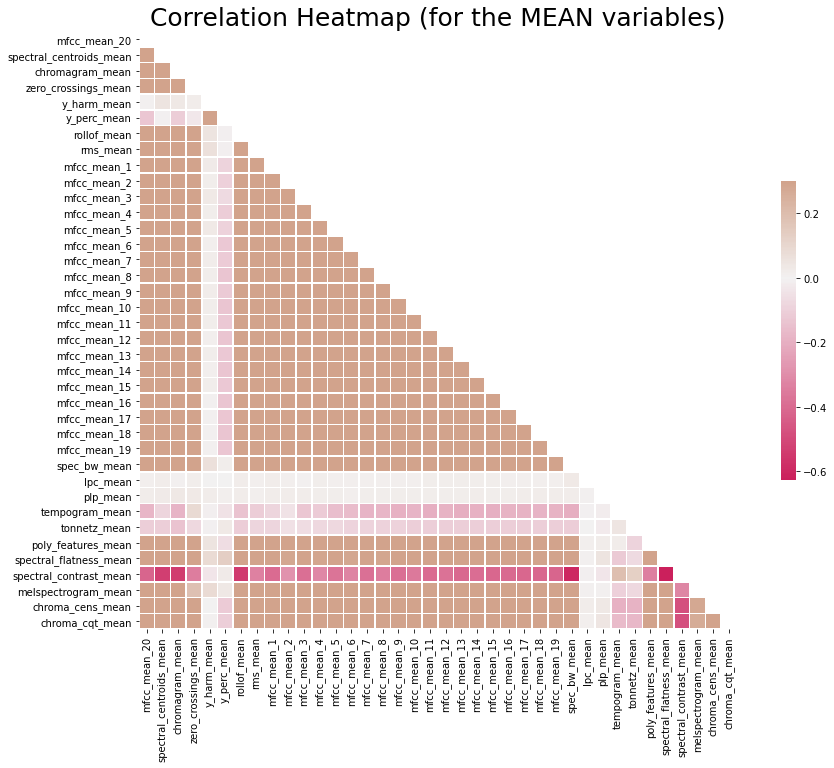

In [7]:
spike_cols = [col for col in df.columns if 'mean' in col]       #Correlations for mean variables.
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

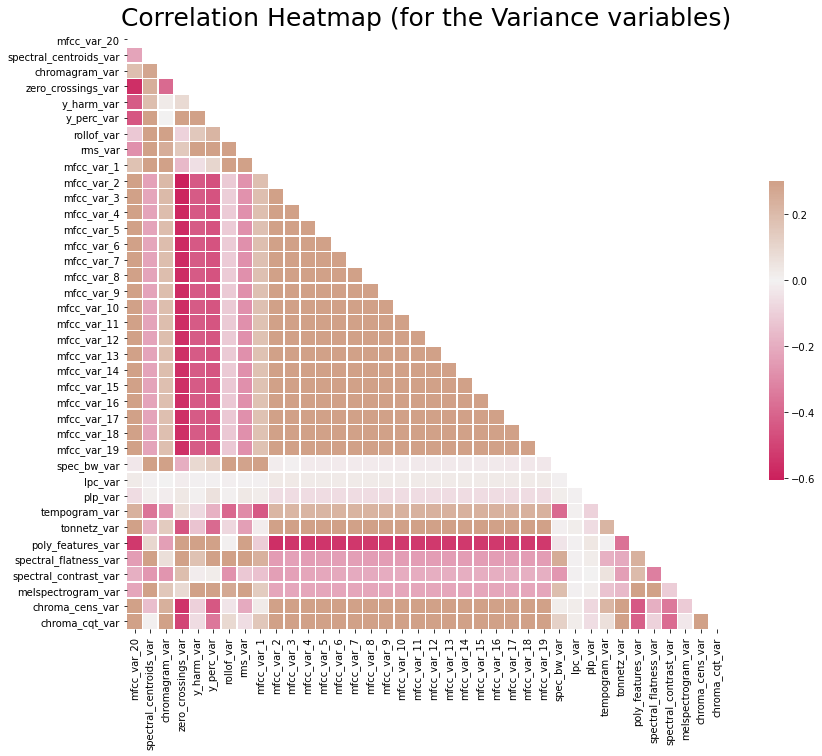

In [8]:
spike_cols = [col for col in df.columns if 'var' in col]       #Correlations for variance variables.
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the Variance variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [9]:
columns = [col for col in df_X.columns if not 'mfcc' in col]
# I dont want to take all mfccs because their distribution nearly same                       
columns.append("mfcc_var_19") # Just takin mfcc_19
columns.append("mfcc_mean_19")

df_X[columns].describe()     #Looking at the distribution of data

,spectral_centroids_mean,chromagram_mean,zero_crossings_mean,y_harm_mean,y_perc_mean,rollof_mean,rms_mean,spec_bw_mean,lpc_mean,plp_mean,...,tonnetz_var,poly_features_var,spectral_flatness_var,spectral_contrast_var,melspectrogram_var,chroma_cens_var,chroma_cqt_var,tempo,mfcc_var_19,mfcc_mean_19
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,2202.446626,0.380036,0.103816,-0.000365,-0.000397,4572.751323,0.130118,2244.963824,-1.249418e+07,0.290970,...,0.013259,4.498562,1.169402e-03,49.533669,2710.629630,0.020435,0.063035,124.575017,2755.539179,-0.618631
std,750.410551,0.090559,0.046155,0.001700,0.001112,1639.140449,0.068175,541.175360,1.181440e+09,0.023456,...,0.013935,4.525410,2.651848e-03,30.070861,6887.379107,0.012588,0.013139,32.532070,2667.209327,5.645808
min,482.447963,0.115480,0.013675,-0.026748,-0.008769,671.256197,0.000948,678.517411,-1.178747e+11,0.146492,...,0.000159,0.000064,3.012068e-09,5.618554,0.000003,0.001944,0.022000,24.377211,220.343338,-25.909060
25%,1635.417234,0.315453,0.068077,-0.000118,-0.000562,3390.941162,0.083330,1891.521787,1.371549e-03,0.287151,...,0.004278,1.243175,1.396137e-05,22.396462,101.592203,0.010222,0.053642,103.359375,1132.820282,-3.442758
50%,2213.412152,0.385538,0.099138,-0.000013,-0.000053,4638.210543,0.120613,2233.806741,2.299446e-03,0.294393,...,0.008053,3.085537,1.120251e-04,39.513962,469.413940,0.017104,0.063710,123.046875,1789.346863,0.414779
75%,2713.436517,0.442723,0.134240,0.000015,0.000019,5598.156597,0.175321,2591.381432,3.623920e-03,0.301089,...,0.017081,6.480304,1.141843e-03,76.869342,2022.393555,0.028688,0.072838,143.554688,3440.931519,3.331905
max,5432.278846,0.751176,0.351214,0.015719,0.006843,9486.121357,0.440458,3708.279662,6.750979e+07,0.385677,...,0.128895,35.310851,8.547951e-02,140.244938,80185.656250,0.065343,0.109343,287.109375,23747.201172,12.593601


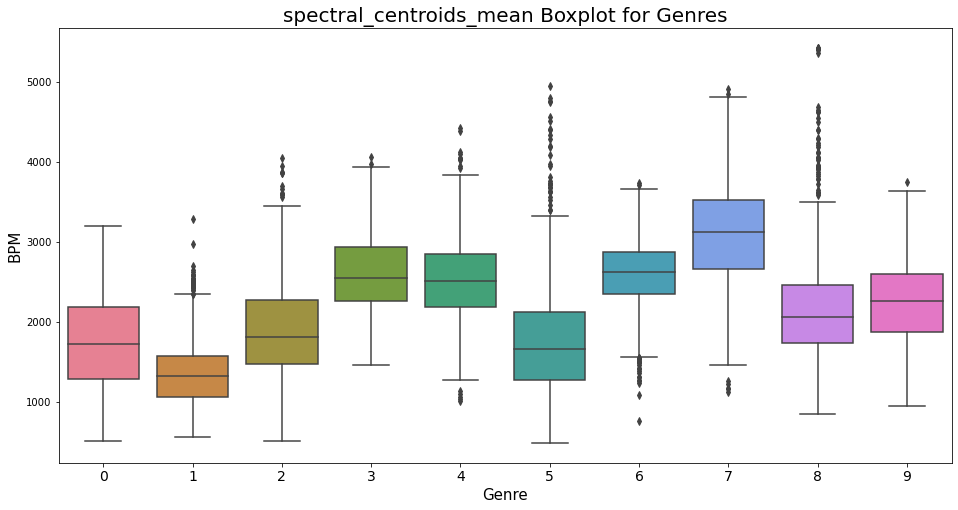

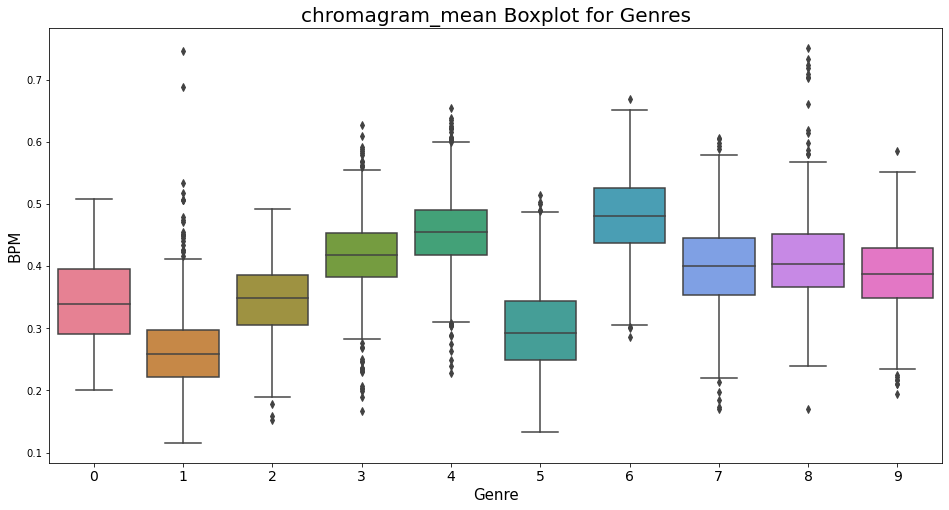

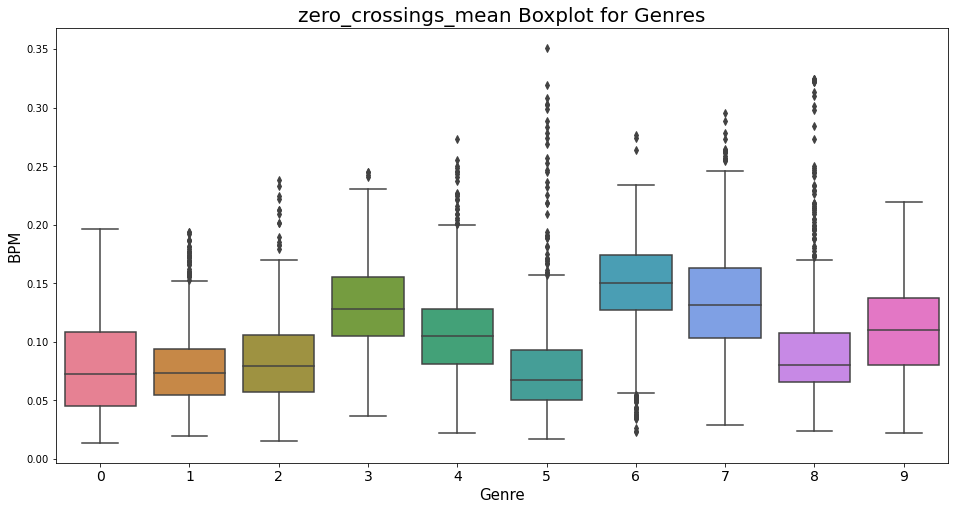

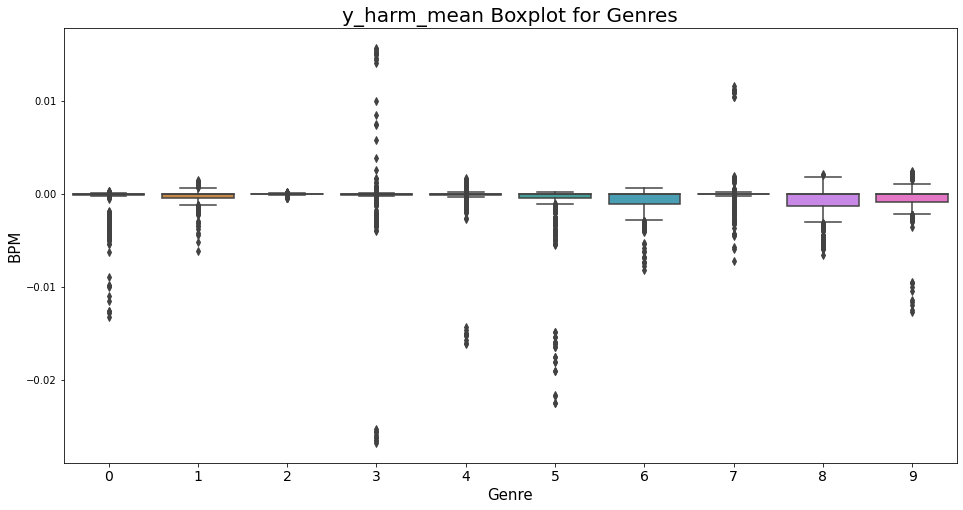

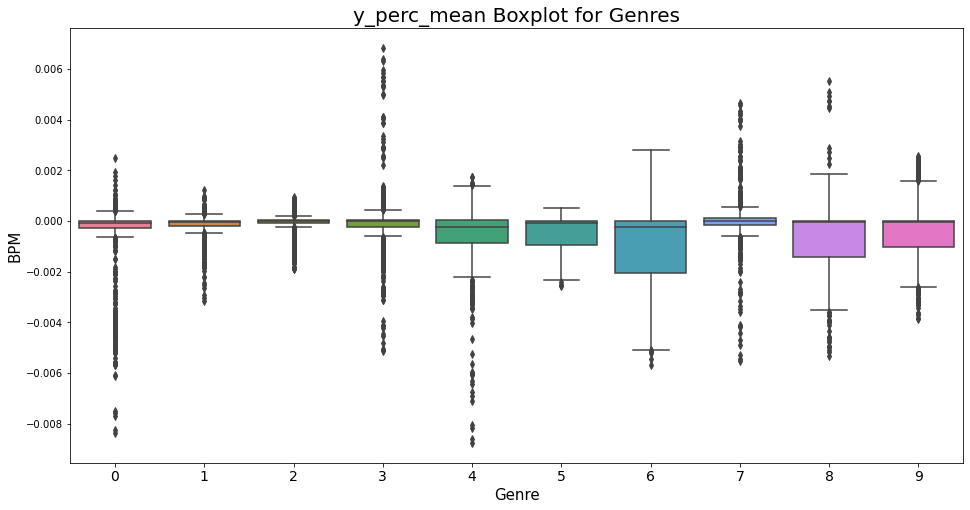

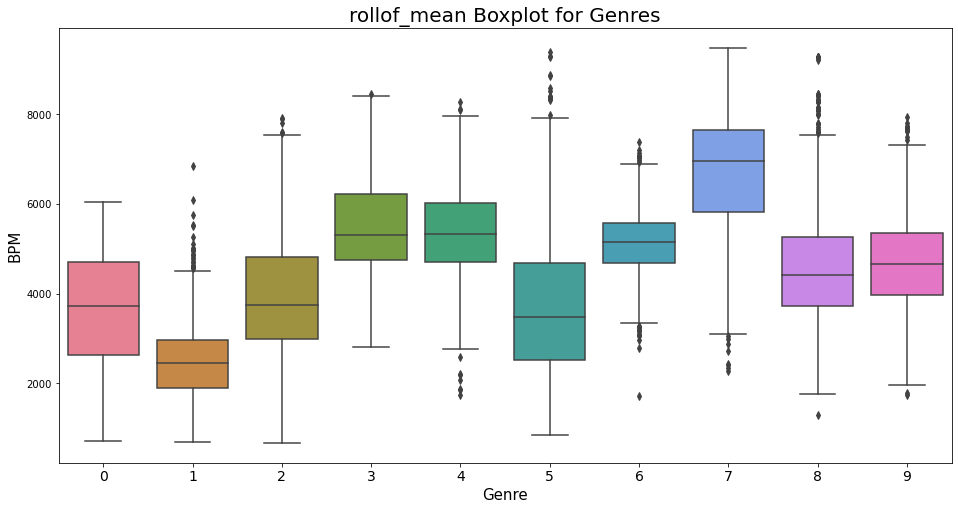

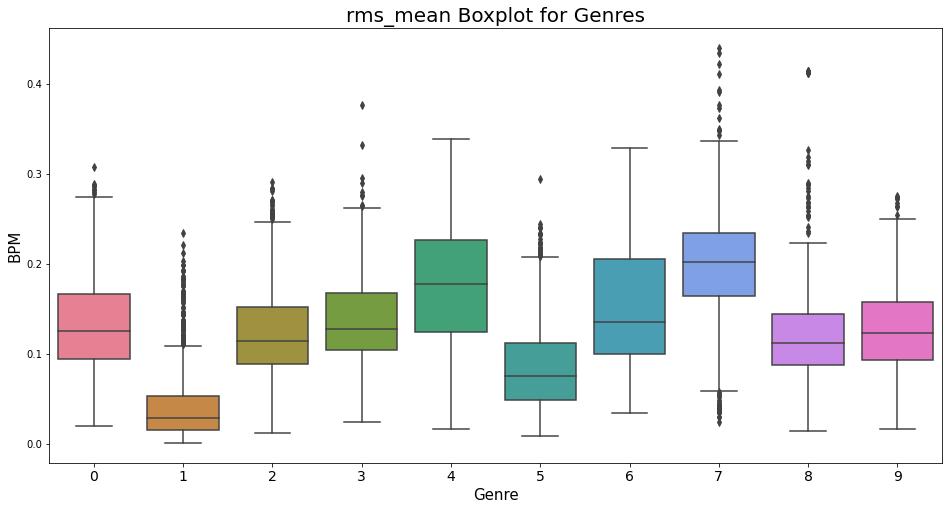

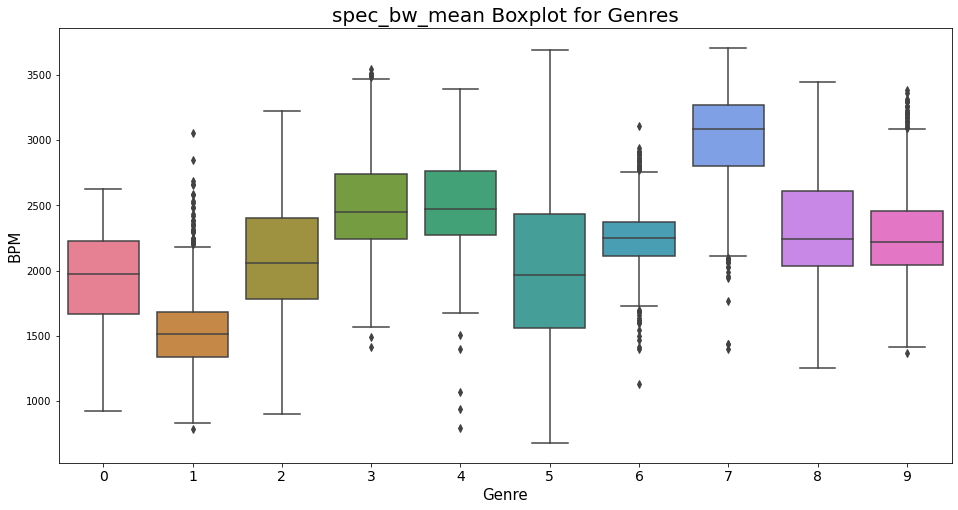

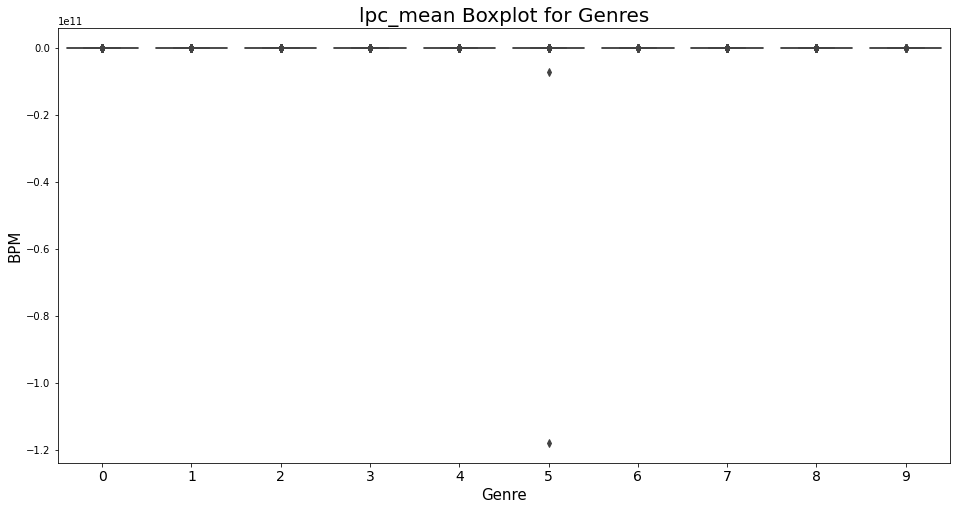

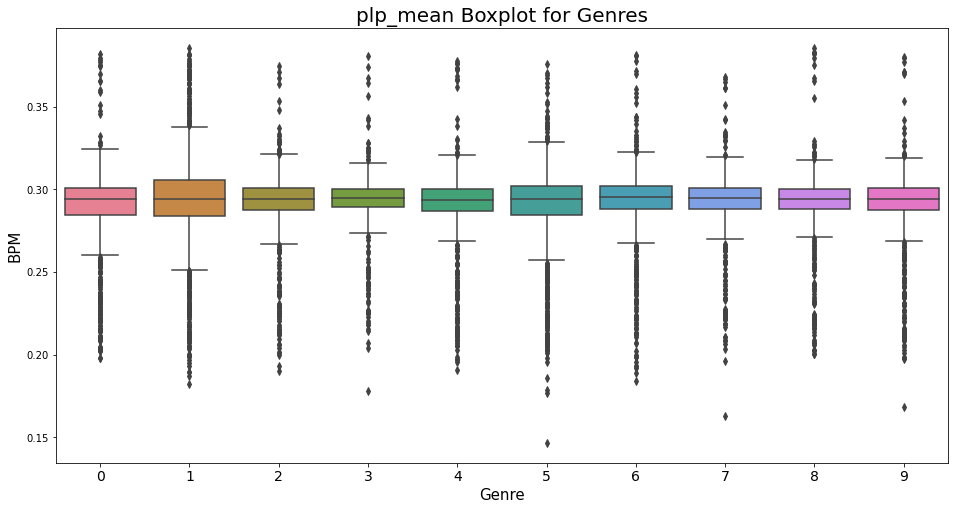

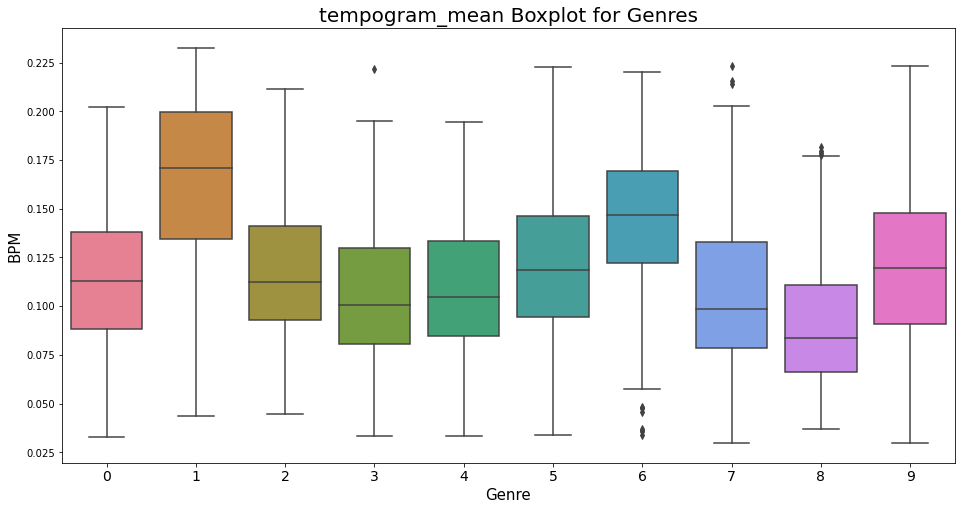

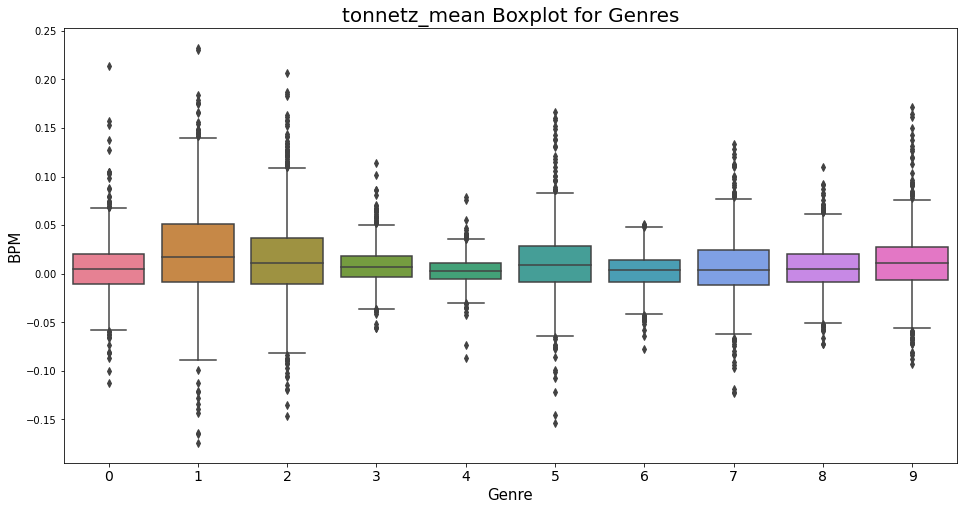

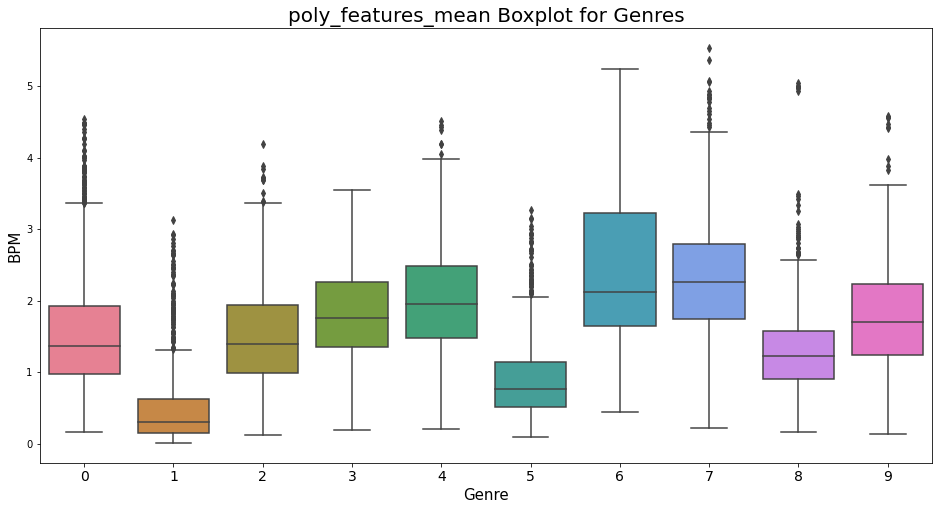

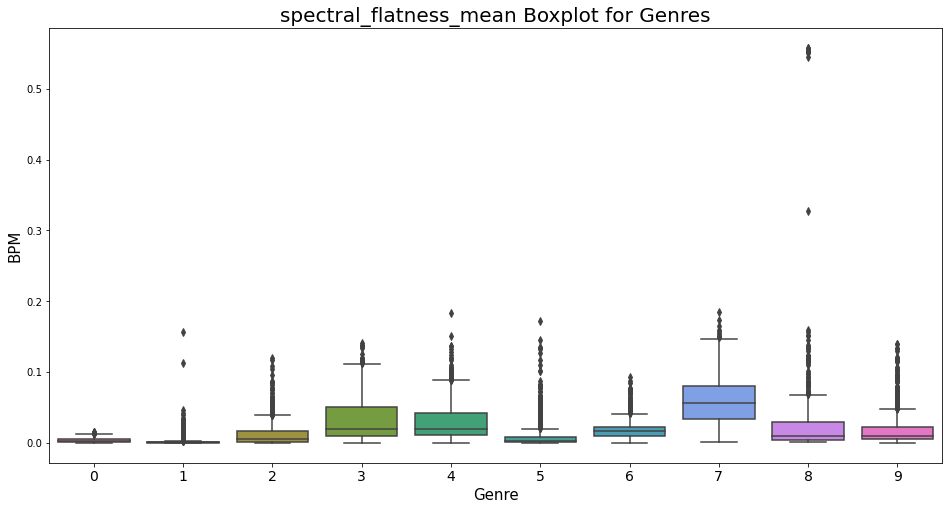

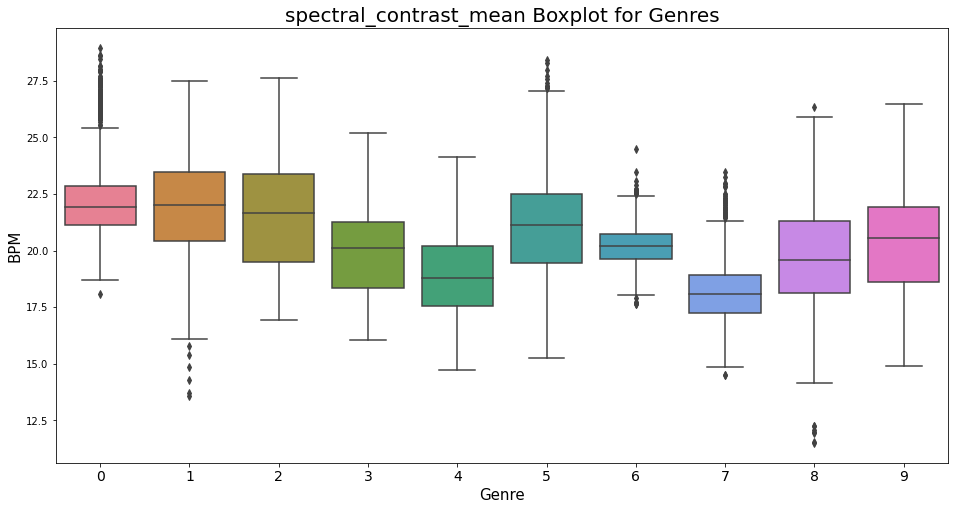

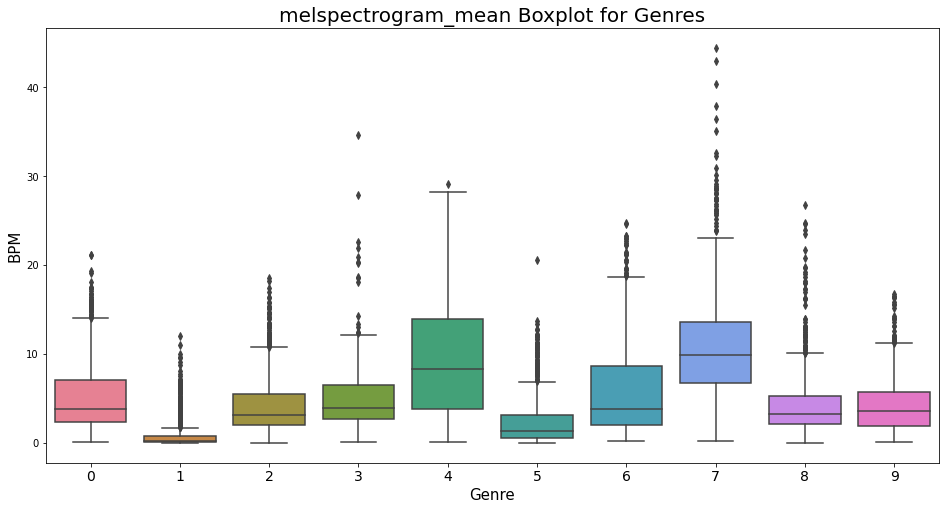

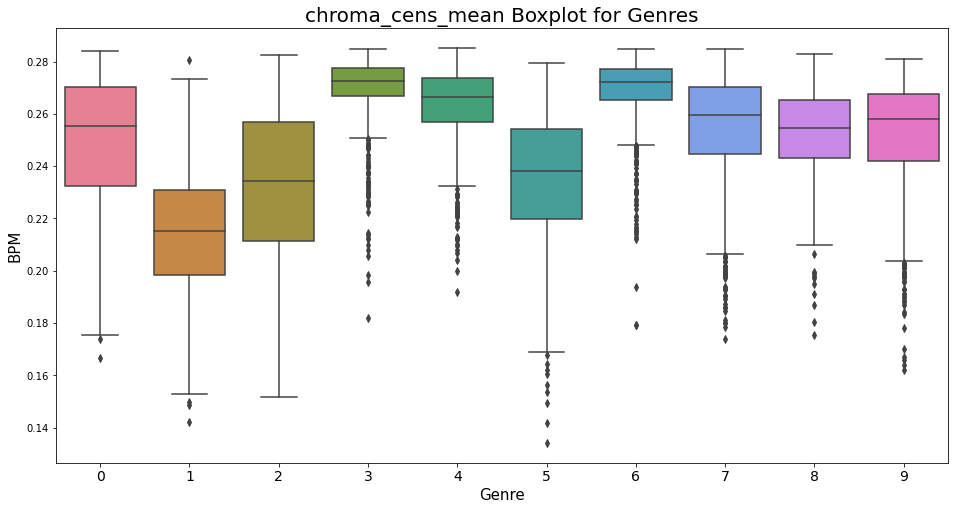

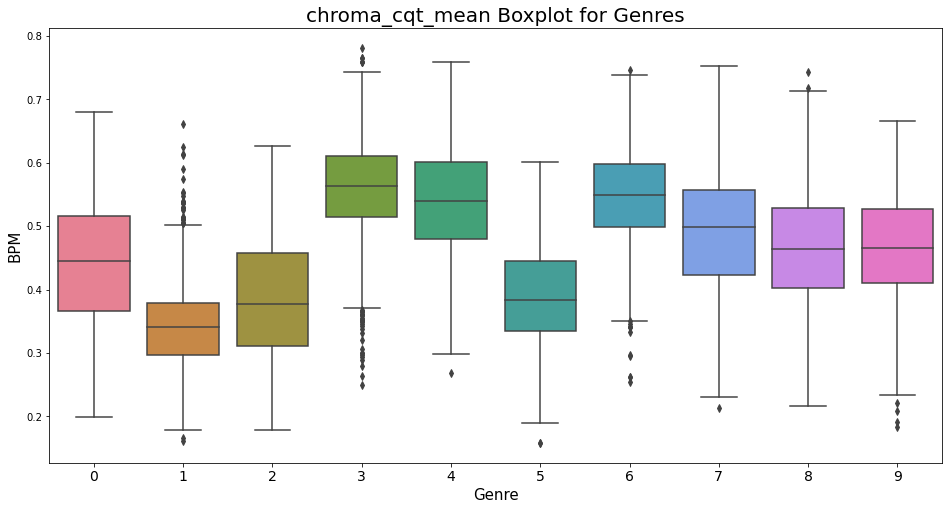

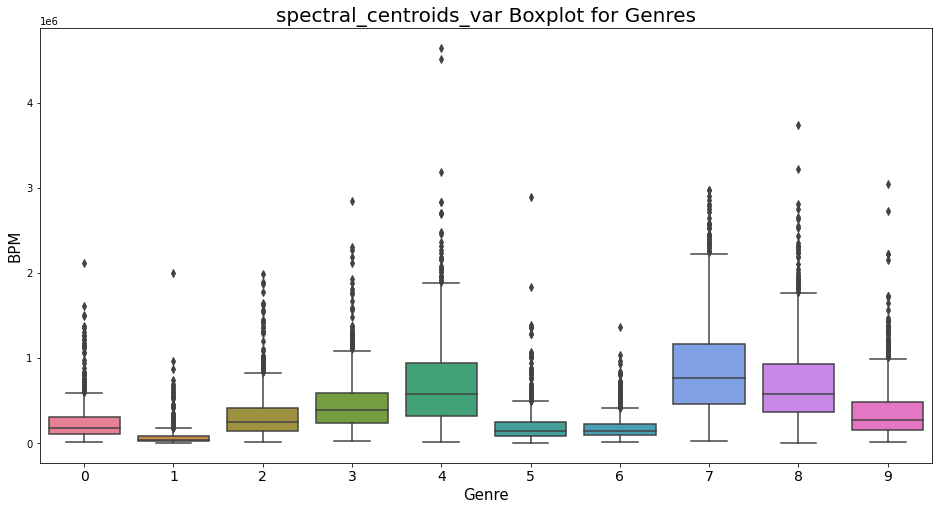

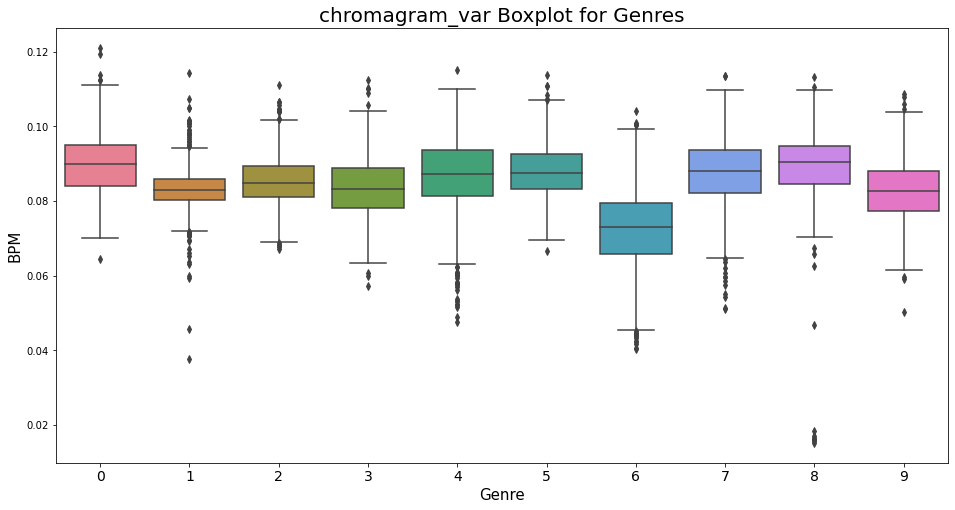

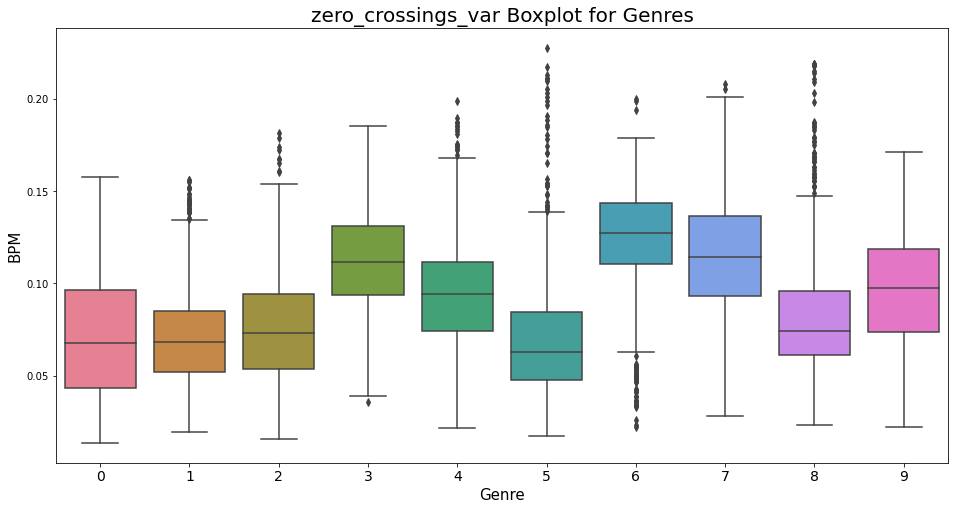

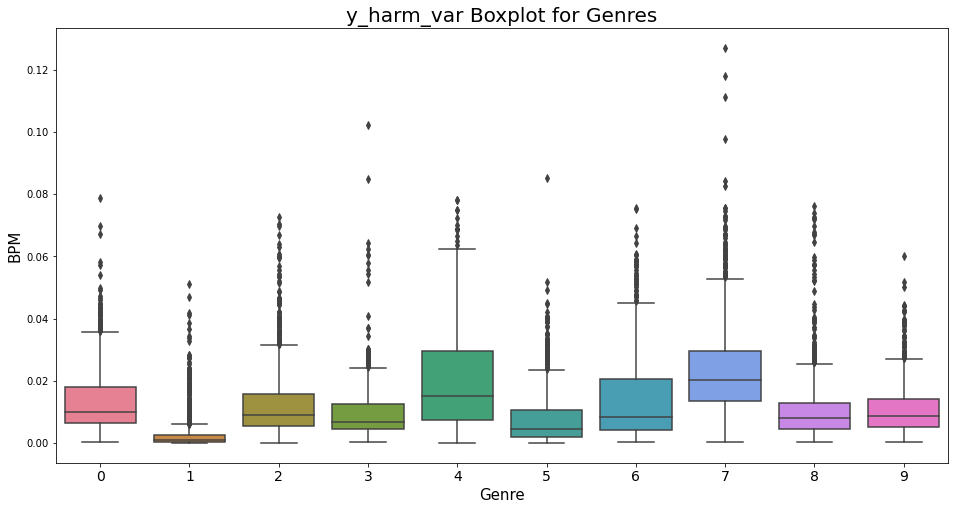

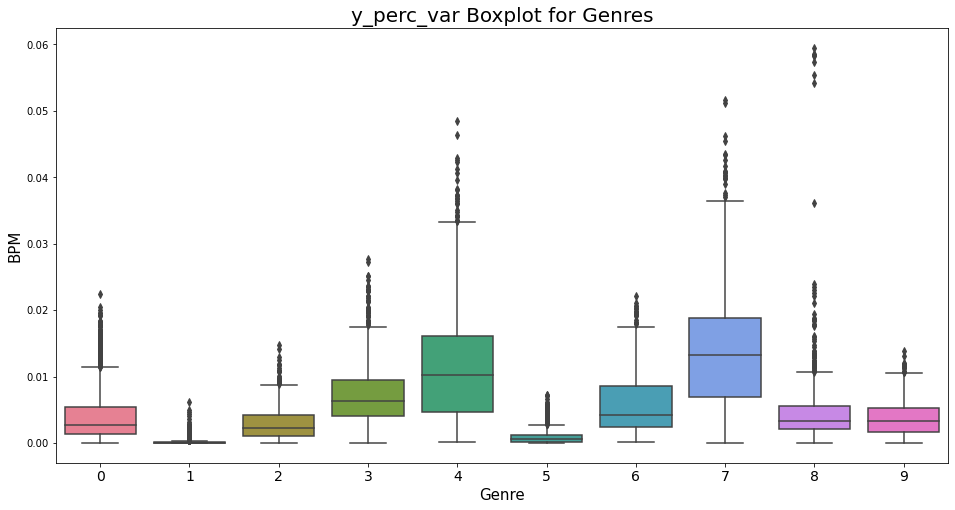

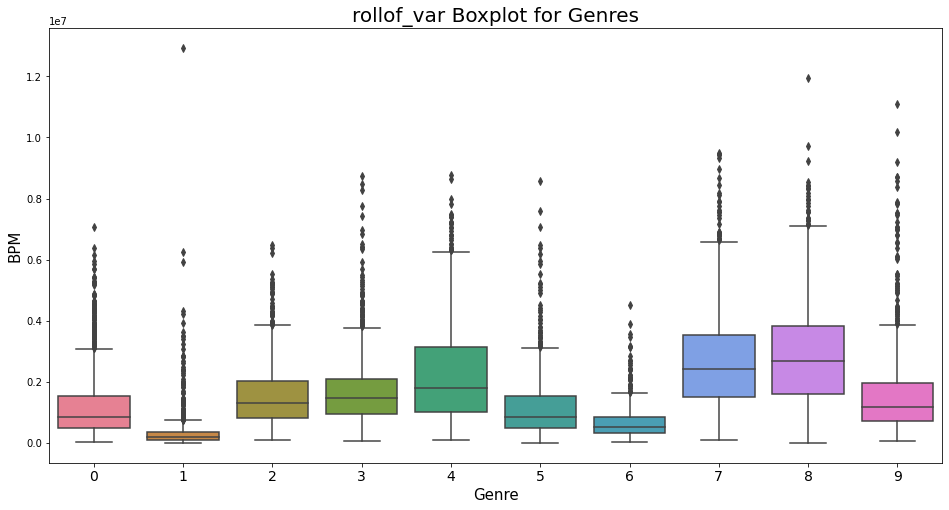

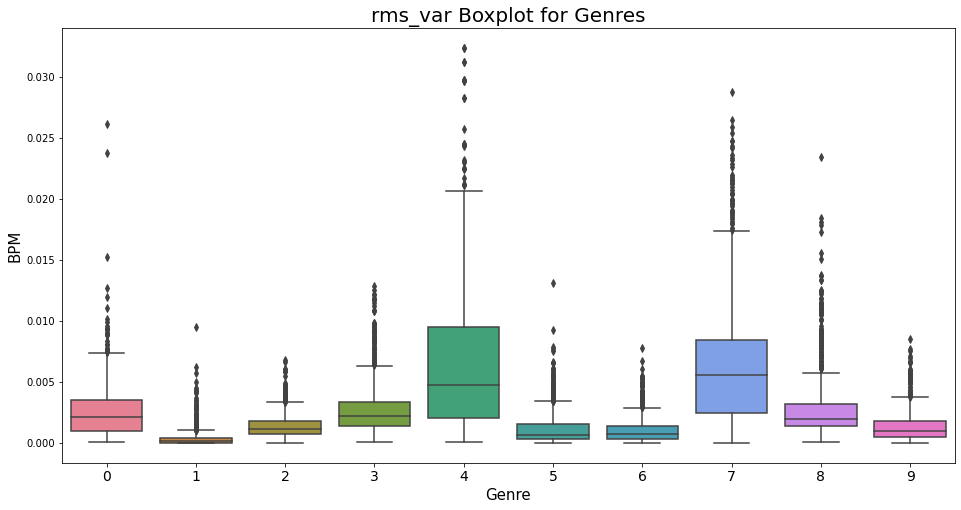

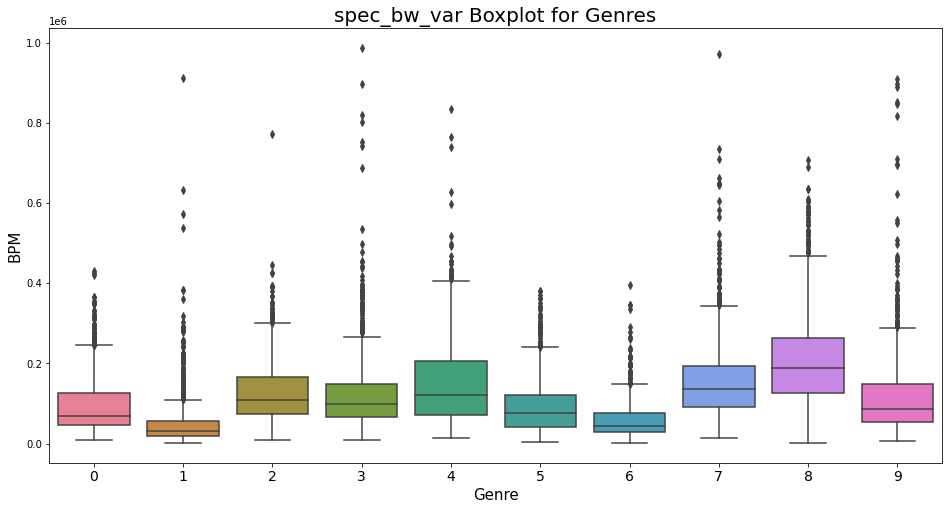

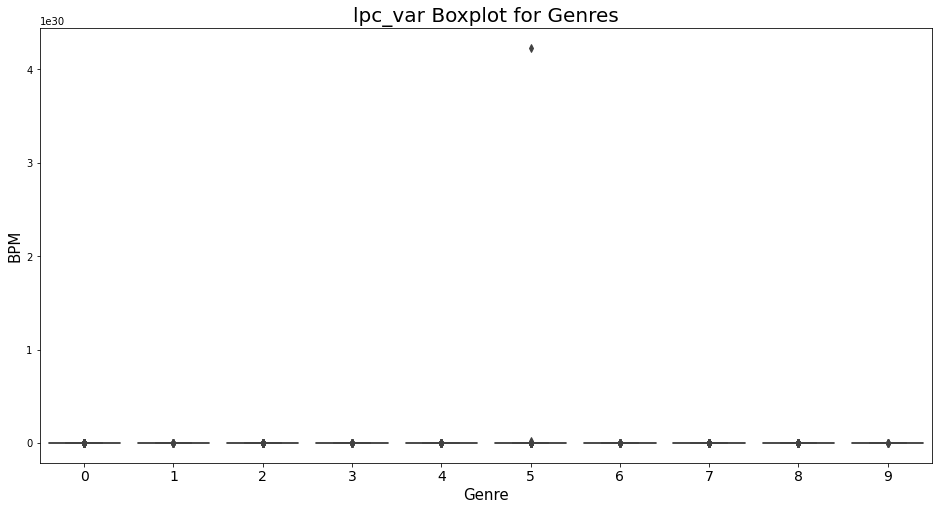

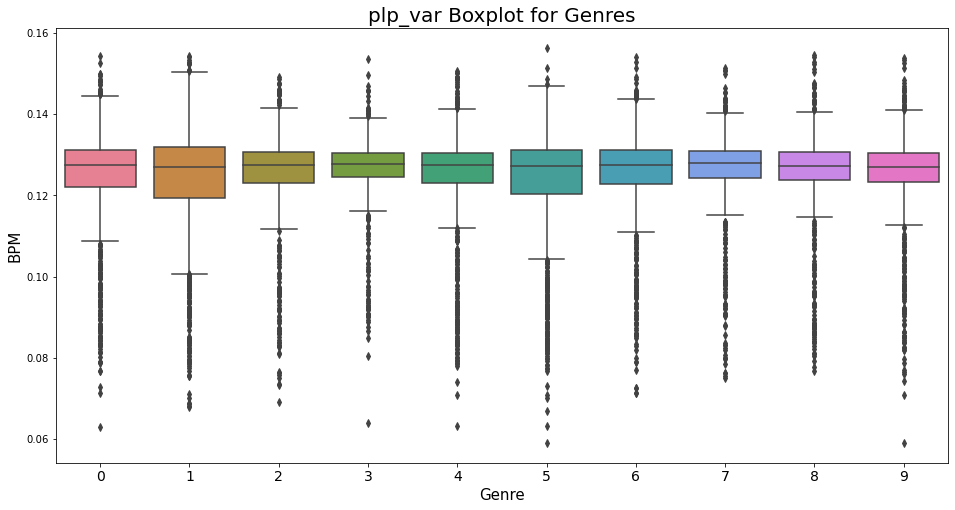

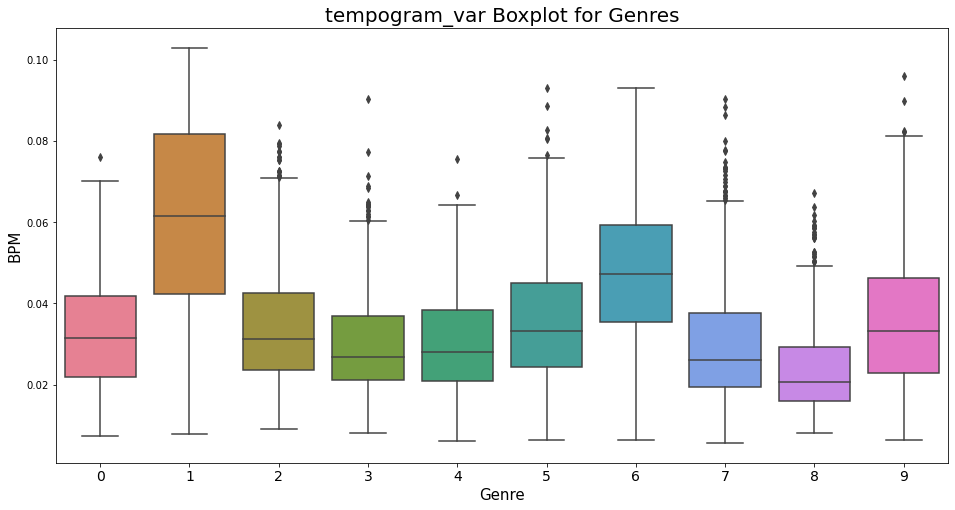

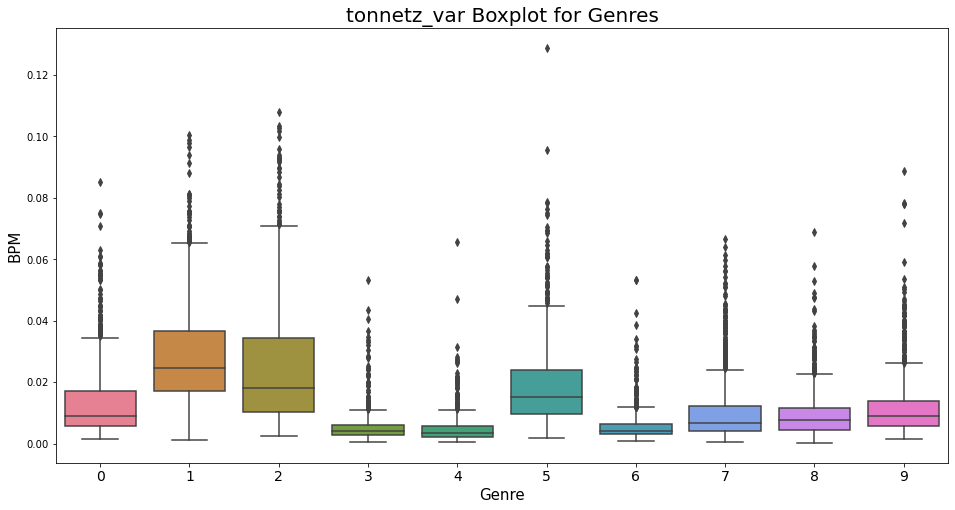

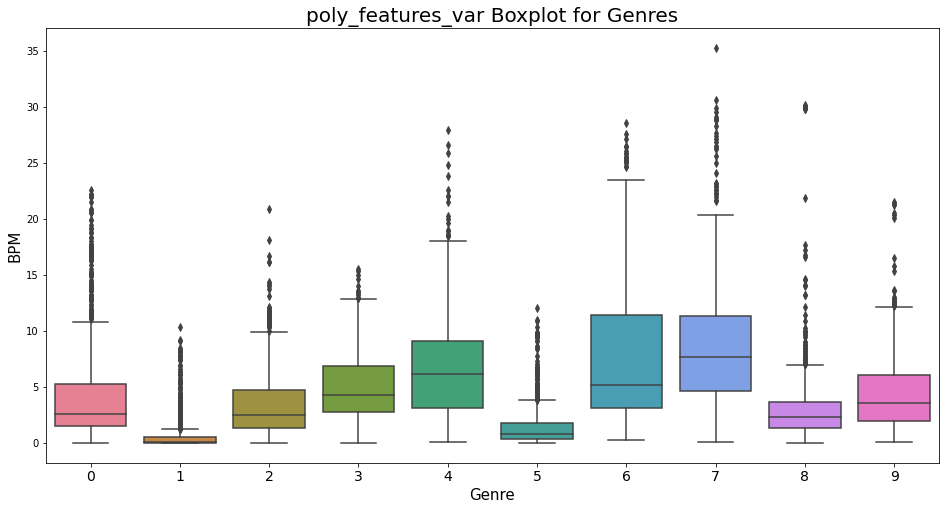

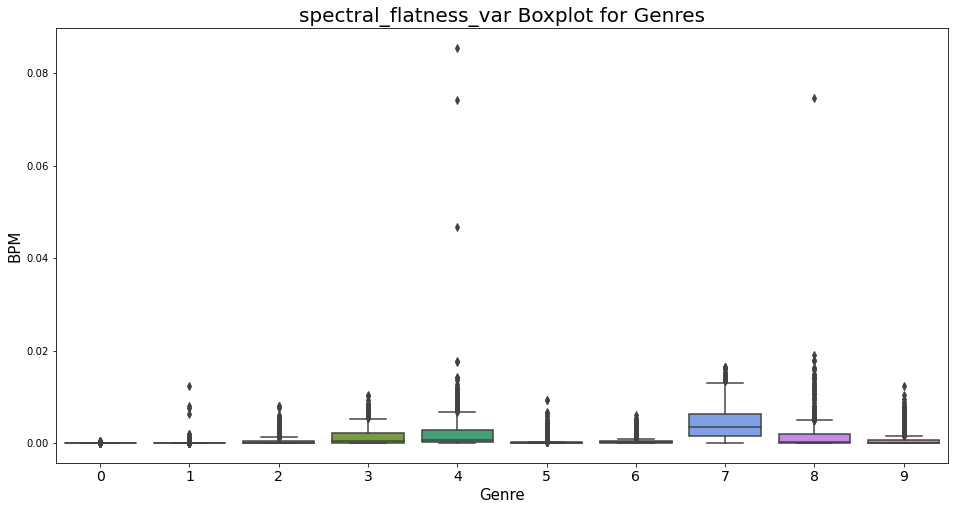

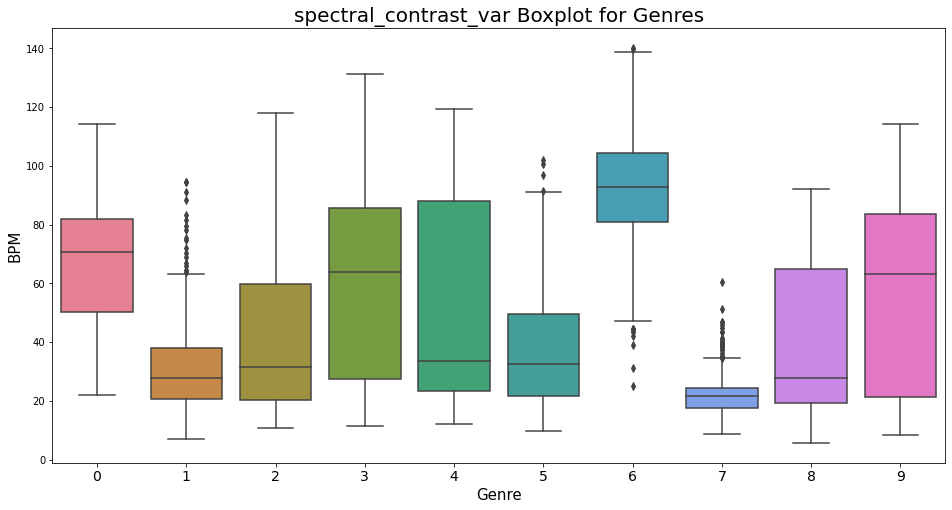

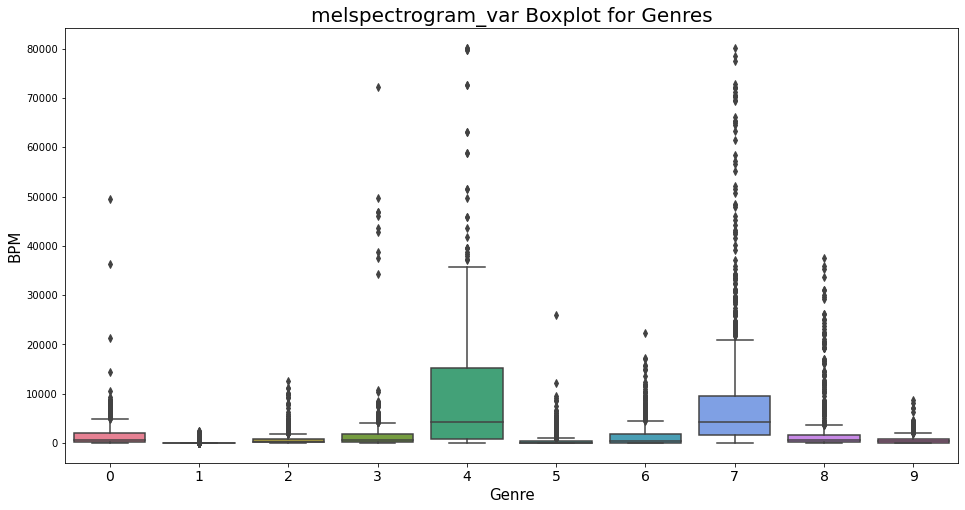

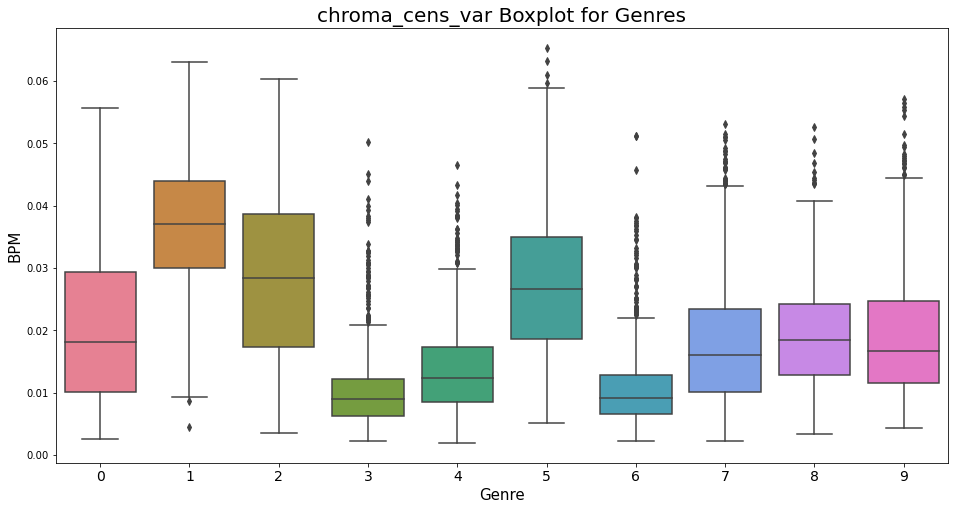

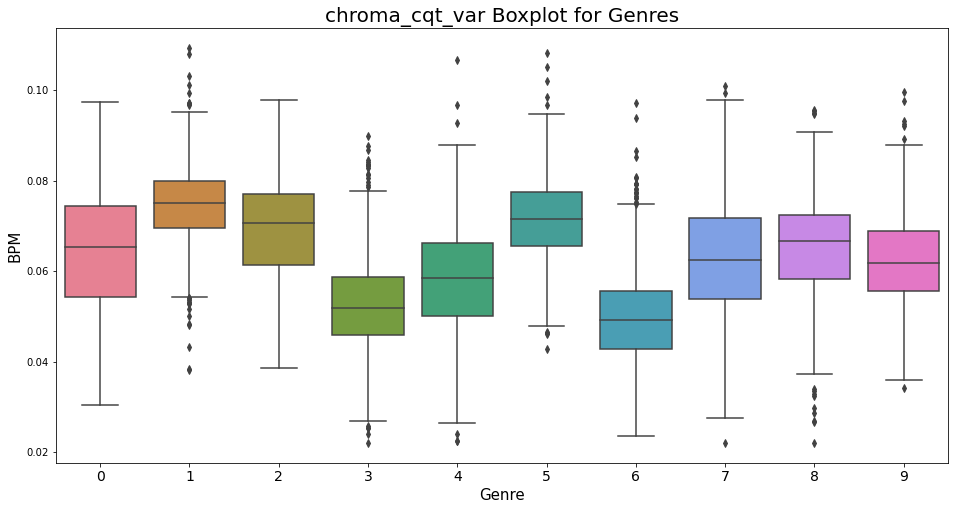

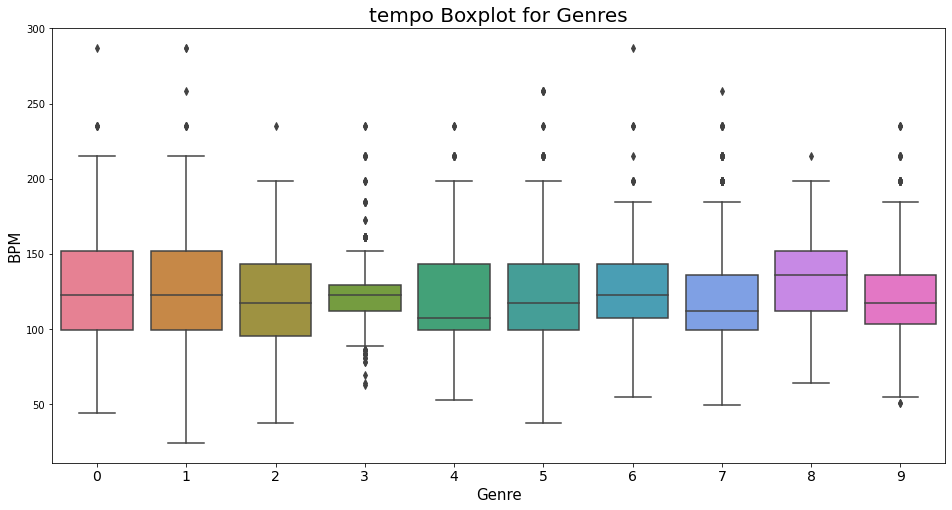

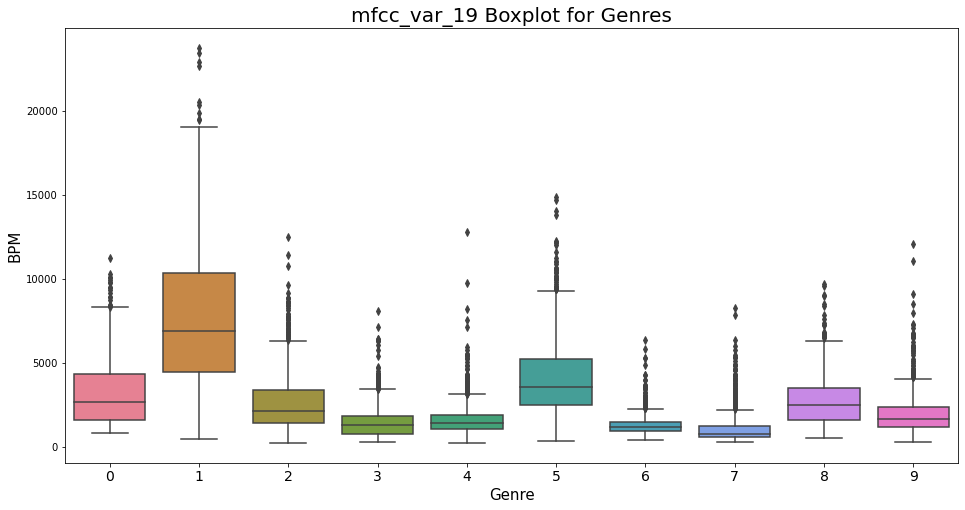

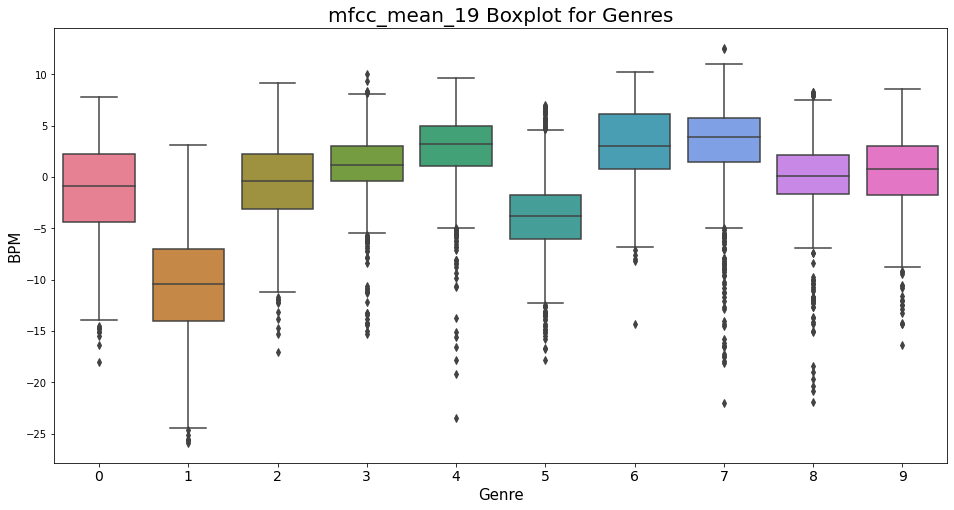

In [10]:
for i in columns:

    x = df[["labels", i]]

    fig, ax = plt.subplots(figsize=(16, 8));
    sns.boxplot(x = "labels", y = i, data = x, palette = 'husl');

    plt.title('{} Boxplot for Genres'.format(i), fontsize = 20)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 10);
    plt.xlabel("Genre", fontsize = 15)
    plt.ylabel("BPM", fontsize = 15)
    

# Scaling Features

In [11]:
cols = df_X.columns
scaler = MinMaxScaler(feature_range = (0,1)) 
df_X = scaler.fit_transform(df_X)
df_X = pd.DataFrame(df_X, columns = cols)         #Scaling features before train_test_split

# PCA for Feature Extraction

In [14]:
pca = PCA(n_components=10)
pca_X = pca.fit_transform(df_X) # We will use this later.

# LDA for Feature Extraction 

In [25]:
lda = LinearDiscriminantAnalysis(n_components = 9)
lda_X = lda.fit_transform(df_X,df_Y) # we will use this later.

# Train Test Validation Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split( df_X, df_Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state= 15) # Raw data.


X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split( lda_X, df_Y, test_size=0.15, random_state=42)
X_train_lda, X_val_lda, y_train_lda, y_val_lda = train_test_split( X_train_lda, y_train_lda, test_size=0.2, random_state= 15) # LDA


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( pca_X, df_Y, test_size=0.15, random_state=42)
X_train_pca, X_val_pca, y_train_pca, y_val_pca= train_test_split( X_train_pca, y_train_pca, test_size=0.2, random_state= 15) # PCA



print("Train set size : {}\nTest set size : {}\nValidation set size : {}".format(X_train.shape[0],X_test.shape[0],X_val.shape[0]))
print("The dimension of train dataset for raw data is {}".format(X_train.shape[1]))





Train set size : 6792
Test set size : 1499
Validation set size : 1699
The dimension of train dataset for raw data is 77


# Model Selection

# KNN

N_neighbours : 2 Score : 0.8458972648432288
N_neighbours : 3 Score : 0.8385590393595731
N_neighbours : 4 Score : 0.8398932621747832
N_neighbours : 5 Score : 0.8385590393595731
N_neighbours : 6 Score : 0.8438959306204136
N_neighbours : 7 Score : 0.8332221480987325
N_neighbours : 8 Score : 0.829219479653102
N_neighbours : 9 Score : 0.8125416944629753
N_neighbours : 10 Score : 0.8198799199466311
N_neighbours : 11 Score : 0.8132088058705804
N_neighbours : 12 Score : 0.8105403602401601
N_neighbours : 13 Score : 0.800533689126084
N_neighbours : 14 Score : 0.8038692461641094


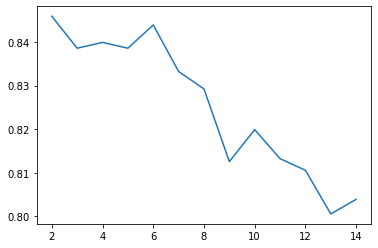

In [29]:
list1 = list()
list2 = list()

                                                                                    #Weights distance better
for i in range(2,15):
    neigh = KNeighborsClassifier(n_neighbors = i,weights = "distance",algorithm = "brute"
                                 ,p = 1)
    neigh.fit(X_train, y_train)
    list1.append(i)
    list2.append(neigh.score(X_test,y_test))
    print("N_neighbours : {} Score : {}".format(i,neigh.score(X_test,y_test))) 
plt.plot(list1,list2)
plt.show()

In [38]:
neigh = KNeighborsClassifier(n_neighbors =1,weights = "distance",algorithm = "brute"
                                 ,p = 1)

start = dt.now()
neigh.fit(X_train.values, y_train)
running_time_knn = (dt.now()-start).seconds
score_knn = round(neigh.score(X_test,y_test),2)
print("The best score with KNN for raw data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(neigh.score(X_test.values,y_test)*100,2),running_time_knn))


start = dt.now()
neigh.fit(X_train_pca, y_train_pca)
running_time_knn = (dt.now()-start).seconds
score_knn_pca = round(neigh.score(X_test_pca,y_test_pca),2)
print("The best score with KNN for PCA data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(neigh.score(X_test_pca,y_test_pca)*100,2),running_time_knn))


start = dt.now()
neigh.fit(X_train_lda, y_train_lda)
running_time_knn = (dt.now()-start).seconds
score_knn_lda = round(neigh.score(X_test_lda,y_test_lda),2)
print("The best score with KNN for LDA data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(neigh.score(X_test_lda,y_test_lda)*100,2),running_time_knn))


The best score with KNN for raw data is %84.59
Running Time (Seconds) : 0.00
The best score with KNN for PCA data is %69.85
Running Time (Seconds) : 0.00
The best score with KNN for LDA data is %81.19
Running Time (Seconds) : 0.00


# Support Vector Classifier (SVC)

C Value : 1 Score : 0.7147628590514362
C Value : 101 Score : 0.8463593854375417
C Value : 201 Score : 0.8617234468937875
C Value : 301 Score : 0.8670674682698731
C Value : 401 Score : 0.8684034736138945
C Value : 501 Score : 0.8704074816299265
C Value : 601 Score : 0.8650634602538411
C Value : 701 Score : 0.8670674682698731
C Value : 801 Score : 0.8677354709418837
C Value : 901 Score : 0.8677354709418837


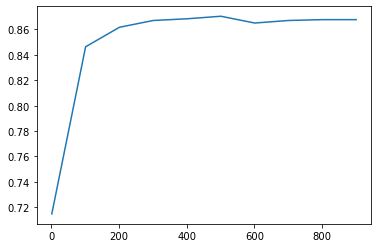

In [193]:
list1 = list()
list2 = list()
                                                                                    #Optimizing C value.
for i in range(1,1001,100):
    clf = SVC(C = i,kernel = "poly",degree = 4,gamma = "scale")
    clf.fit(X_train,y_train)
    clf.score(X_test,y_test)
    list1.append(i)
    list2.append(clf.score(X_test,y_test))
    print("C Value : {} Score : {}".format(i,clf.score(X_test,y_test))) 
plt.plot(list1,list2)


In [39]:
# The best model SVC Model
svc = SVC(C = 1000,kernel = "poly",degree = 6,gamma = "scale")
start = dt.now()
svc.fit(X_train,y_train)
running_time_svc = (dt.now()-start).seconds
score_svc = round(svc.score(X_test,y_test),2)
print("The best score with SVC for Raw Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(svc.score(X_test,y_test)*100,2),running_time_svc))



start = dt.now()
svc.fit(X_train_pca,y_train_pca)
running_time_svc = (dt.now()-start).seconds
score_svc_pca = round(svc.score(X_test_pca,y_test_pca),2)
print("The best score with SVC for PCA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(svc.score(X_test_pca,y_test_pca)*100,2),running_time_svc))


start = dt.now()
svc.fit(X_train_lda,y_train_lda)
running_time_svc = (dt.now()-start).seconds
score_svc_lda = round(svc.score(X_test_lda,y_test_lda),2)
print("The best score with SVC for LDA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(svc.score(X_test_lda,y_test_lda)*100,2),running_time_svc))

The best score with SVC for Raw Data is %87.99
Running Time (Seconds) : 6.00
The best score with SVC for PCA Data is %63.84
Running Time (Seconds) : 4.00
The best score with SVC for LDA Data is %72.05
Running Time (Seconds) : 1.00


# Random Forest Classifier

max_depth : 10 Score : 0.7748830995323981
max_depth : 11 Score : 0.7969271877087508
max_depth : 13 Score : 0.8203072812291249
max_depth : 14 Score : 0.8169672678690715
max_depth : 16 Score : 0.822311289245157
max_depth : 17 Score : 0.8256513026052105
max_depth : 19 Score : 0.8289913159652639
max_depth : 20 Score : 0.8142952571810287
max_depth : 22 Score : 0.8216432865731463
max_depth : 23 Score : 0.8176352705410822
max_depth : 25 Score : 0.8229792919171677
max_depth : 26 Score : 0.8136272545090181
max_depth : 28 Score : 0.8196392785571143
max_depth : 30 Score : 0.8209752839011356


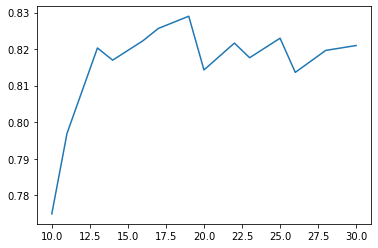

In [52]:
n_estimators = np.linspace(10,100,10,dtype = int)
criterion = ["gini","entropy"]
max_depth = np.linspace(10,30,14,dtype = int)
min_samples_leaf = np.linspace(1,10,10,dtype = int)
max_features = ["auto","sqrt","log2"]
min_samples_split = np.linspace(2,10,9,dtype = int)


list1 = list()
list2 = list()

for i in max_depth:
    rfc = RandomForestClassifier(n_estimators = 80
                                 ,criterion = "entropy"
                                 ,max_depth = i
                                 ,min_samples_leaf = 1
                                 ,max_features = "auto"
                                 ,min_samples_split = 2)
    
    
    rfc.fit(X_train,y_train)
    rfc.score(X_test,y_test)
    list1.append(i)
    list2.append(rfc.score(X_test,y_test))
    
    print("max_depth : {} Score : {}".format(i,rfc.score(X_test,y_test))) 
plt.plot(list1,list2)

In [40]:
# The best model Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators = 80
                                 ,criterion = "entropy"
                                 ,max_depth = 19
                                 ,min_samples_leaf = 1
                                 ,max_features = "auto"
                                 ,min_samples_split = 2)
start = dt.now()
rfc.fit(X_train,y_train)
running_time_rfc = (dt.now()-start).seconds
score_rfc = round(rfc.score(X_test,y_test),2)
print("The best score with Random Forest Classifier for Raw Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}"
      .format(round(rfc.score(X_test,y_test)*100,2),running_time_rfc))


start = dt.now()
rfc.fit(X_train_pca,y_train_pca)
running_time_rfc = (dt.now()-start).seconds
score_rfc_pca = round(rfc.score(X_test_pca,y_test_pca),2)
print("The best score with Random Forest Classifier for PCA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}"
      .format(round(rfc.score(X_test_pca,y_test_pca)*100,2),running_time_rfc))




start = dt.now()
rfc.fit(X_train_lda,y_train_lda)
running_time_rfc = (dt.now()-start).seconds
score_rfc_lda = round(rfc.score(X_test_lda,y_test_lda),2)
print("The best score with Random Forest Classifier for LDA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}"
      .format(round(rfc.score(X_test_lda,y_test_lda)*100,2),running_time_rfc))


The best score with Random Forest Classifier for Raw Data is %87.32
Running Time (Seconds) : 9.00
The best score with Random Forest Classifier for PCA Data is %69.85
Running Time (Seconds) : 4.00
The best score with Random Forest Classifier for LDA Data is %80.99
Running Time (Seconds) : 3.00


# Decision Tree Classifier

max_depth : 1 Score : 0.16098864395457582
max_depth : 2 Score : 0.24248496993987975
max_depth : 3 Score : 0.3079492317969272
max_depth : 4 Score : 0.4014696058784235
max_depth : 5 Score : 0.44355377421509684
max_depth : 6 Score : 0.47962591850367403
max_depth : 7 Score : 0.5043420173680695
max_depth : 8 Score : 0.5457581830327322
max_depth : 9 Score : 0.552438209752839
max_depth : 10 Score : 0.5831663326653307
max_depth : 11 Score : 0.6018704074816299
max_depth : 12 Score : 0.6158984635938544
max_depth : 13 Score : 0.6366065464261857
max_depth : 14 Score : 0.6366065464261857
max_depth : 15 Score : 0.6432865731462926
max_depth : 16 Score : 0.655310621242485
max_depth : 17 Score : 0.6526386105544422
max_depth : 18 Score : 0.6646626586506346
max_depth : 19 Score : 0.6593186372745491
max_depth : 20 Score : 0.6613226452905812
max_depth : 21 Score : 0.6499665998663995
max_depth : 22 Score : 0.642618570474282
max_depth : 23 Score : 0.6559786239144957
max_depth : 24 Score : 0.6459585838343354


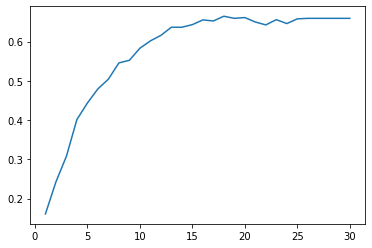

In [77]:
criterion = ["gini","entropy"]
splitter = ["best","random"]
max_depth = np.linspace(1,30,30,dtype = int)
min_samples_split = np.linspace(2,10,9,dtype = int)
max_features = ["auto","sqrt","log2",None]



list1 = list()
list2 = list()

for i in max_depth:
    dtc = DecisionTreeClassifier(random_state = 42
                                 ,criterion = "gini"
                                 ,splitter = "best"
                                 ,max_features = None
                                 ,min_samples_split = 2
                                 ,max_depth = i)
    
    
    dtc.fit(X_train,y_train)
    dtc.score(X_test,y_test)
    list1.append(i)
    list2.append(dtc.score(X_test,y_test))
    
    print("max_depth : {} Score : {}".format(i,dtc.score(X_test,y_test))) 
plt.plot(list1,list2)

In [41]:
# The best model Decision Tree Classifier Model
dtc = DecisionTreeClassifier(random_state = 42
                                 ,criterion = "gini"
                                 ,splitter = "best"
                                 ,max_features = None
                                 ,min_samples_split = 2
                                 ,max_depth = 18)
start = dt.now()
dtc.fit(X_train,y_train)
running_time_dtc = (dt.now()-start).seconds
score_dtc = round(dtc.score(X_test,y_test),2)
print("The best score with DTC for Raw Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(dtc.score(X_test,y_test)*100,2),running_time_dtc))



start = dt.now()
dtc.fit(X_train_pca,y_train_pca)
running_time_dtc = (dt.now()-start).seconds
score_dtc_pca = round(dtc.score(X_test_pca,y_test_pca),2)
print("The best score with DTC for PCA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(dtc.score(X_test_pca,y_test_pca)*100,2),running_time_dtc))


start = dt.now()
dtc.fit(X_train_lda,y_train_lda)
running_time_dtc = (dt.now()-start).seconds
score_dtc_lda = round(dtc.score(X_test_lda,y_test_lda),2)
print("The best score with DTC for LDA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(dtc.score(X_test_lda,y_test_lda)*100,2),running_time_dtc))



The best score with DTC for Raw Data is %70.85
Running Time (Seconds) : 0.00
The best score with DTC for PCA Data is %54.04
Running Time (Seconds) : 0.00
The best score with DTC for LDA Data is %67.98
Running Time (Seconds) : 0.00


# XGBOOST 

[0]	validation_0-merror:0.42790
Will train until validation_0-merror hasn't improved in 30 rounds.
[1]	validation_0-merror:0.40236
[2]	validation_0-merror:0.37721
[3]	validation_0-merror:0.36031
[4]	validation_0-merror:0.34224
[5]	validation_0-merror:0.33477
[6]	validation_0-merror:0.33281
[7]	validation_0-merror:0.32613
[8]	validation_0-merror:0.31473
[9]	validation_0-merror:0.30766
[10]	validation_0-merror:0.30373
[11]	validation_0-merror:0.30177
[12]	validation_0-merror:0.29195
[13]	validation_0-merror:0.29116
[14]	validation_0-merror:0.28291
[15]	validation_0-merror:0.27819
[16]	validation_0-merror:0.27701
[17]	validation_0-merror:0.27348
[18]	validation_0-merror:0.26405
[19]	validation_0-merror:0.25933
[20]	validation_0-merror:0.25894
[21]	validation_0-merror:0.26051
[22]	validation_0-merror:0.25776
[23]	validation_0-merror:0.25147
[24]	validation_0-merror:0.24204
[25]	validation_0-merror:0.24322
[26]	validation_0-merror:0.24244
[27]	validation_0-merror:0.23458
[28]	validation_0-m

[41]	validation_0-merror:0.17642
[42]	validation_0-merror:0.18075
[43]	validation_0-merror:0.17878
[44]	validation_0-merror:0.17682
[45]	validation_0-merror:0.17289
[46]	validation_0-merror:0.17407
[47]	validation_0-merror:0.17210
[48]	validation_0-merror:0.17053
[49]	validation_0-merror:0.16857
[50]	validation_0-merror:0.16739
[51]	validation_0-merror:0.16581
[52]	validation_0-merror:0.16346
[53]	validation_0-merror:0.16621
[54]	validation_0-merror:0.16699
[55]	validation_0-merror:0.16424
[56]	validation_0-merror:0.16385
[57]	validation_0-merror:0.16149
[58]	validation_0-merror:0.16149
[59]	validation_0-merror:0.15835
[60]	validation_0-merror:0.16071
[61]	validation_0-merror:0.15914
[62]	validation_0-merror:0.15756
[63]	validation_0-merror:0.15638
[64]	validation_0-merror:0.15363
[65]	validation_0-merror:0.15599
[66]	validation_0-merror:0.15285
[67]	validation_0-merror:0.15324
[68]	validation_0-merror:0.15088
[69]	validation_0-merror:0.14971
[70]	validation_0-merror:0.15088
[71]	valid

[84]	validation_0-merror:0.13910
[85]	validation_0-merror:0.13831
[86]	validation_0-merror:0.13988
[87]	validation_0-merror:0.14067
[88]	validation_0-merror:0.13949
[89]	validation_0-merror:0.14106
[90]	validation_0-merror:0.13949
[91]	validation_0-merror:0.13831
[92]	validation_0-merror:0.13870
[93]	validation_0-merror:0.14145
[94]	validation_0-merror:0.13949
[95]	validation_0-merror:0.13988
[96]	validation_0-merror:0.13792
[97]	validation_0-merror:0.13792
[98]	validation_0-merror:0.13674
[99]	validation_0-merror:0.13753
[100]	validation_0-merror:0.13792
[101]	validation_0-merror:0.13792
[102]	validation_0-merror:0.13713
[103]	validation_0-merror:0.13595
[104]	validation_0-merror:0.13831
[105]	validation_0-merror:0.13713
[106]	validation_0-merror:0.13635
[107]	validation_0-merror:0.13713
[108]	validation_0-merror:0.13792
[109]	validation_0-merror:0.13674
[110]	validation_0-merror:0.13635
[111]	validation_0-merror:0.13635
[112]	validation_0-merror:0.13359
[113]	validation_0-merror:0.13

[126]	validation_0-merror:0.13399
[127]	validation_0-merror:0.13438
[128]	validation_0-merror:0.13281
[129]	validation_0-merror:0.13202
[130]	validation_0-merror:0.13320
[131]	validation_0-merror:0.13202
[132]	validation_0-merror:0.13202
[133]	validation_0-merror:0.13320
[134]	validation_0-merror:0.13359
[135]	validation_0-merror:0.13320
[136]	validation_0-merror:0.13399
[137]	validation_0-merror:0.13399
[138]	validation_0-merror:0.13399
[139]	validation_0-merror:0.13517
[140]	validation_0-merror:0.13635
[141]	validation_0-merror:0.13595
[142]	validation_0-merror:0.13517
[143]	validation_0-merror:0.13595
[144]	validation_0-merror:0.13595
[145]	validation_0-merror:0.13517
[146]	validation_0-merror:0.13517
[147]	validation_0-merror:0.13556
[148]	validation_0-merror:0.13595
[149]	validation_0-merror:0.13635
[150]	validation_0-merror:0.13635
[151]	validation_0-merror:0.13556
[152]	validation_0-merror:0.13556
[153]	validation_0-merror:0.13556
[154]	validation_0-merror:0.13635
[155]	validati

[16]	validation_0-merror:0.18153
[17]	validation_0-merror:0.17760
[18]	validation_0-merror:0.17957
[19]	validation_0-merror:0.18114
[20]	validation_0-merror:0.17367
[21]	validation_0-merror:0.17446
[22]	validation_0-merror:0.17407
[23]	validation_0-merror:0.17328
[24]	validation_0-merror:0.17171
[25]	validation_0-merror:0.16817
[26]	validation_0-merror:0.16778
[27]	validation_0-merror:0.16503
[28]	validation_0-merror:0.16385
[29]	validation_0-merror:0.16071
[30]	validation_0-merror:0.16071
[31]	validation_0-merror:0.15638
[32]	validation_0-merror:0.15638
[33]	validation_0-merror:0.15403
[34]	validation_0-merror:0.15324
[35]	validation_0-merror:0.15324
[36]	validation_0-merror:0.15128
[37]	validation_0-merror:0.15128
[38]	validation_0-merror:0.15010
[39]	validation_0-merror:0.14892
[40]	validation_0-merror:0.15010
[41]	validation_0-merror:0.14892
[42]	validation_0-merror:0.14853
[43]	validation_0-merror:0.15049
[44]	validation_0-merror:0.14853
[45]	validation_0-merror:0.14617
[46]	valid

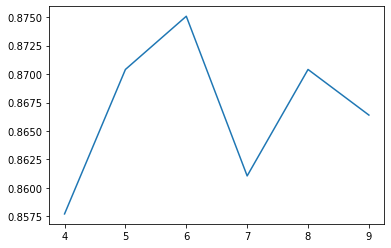

In [31]:
n_estimators = [100,200,300,400,500,600,700,800,900,1000]
learning_rate = np.linspace(0.05,0.3,20)
subsample = np.linspace(0.5,1,6)
max_depth = [4, 5, 6, 7, 8, 9]
colsample_bytree = np.linspace(0,1,11)
min_child_weight = [1,2,3,4]
tree_method = ["auto","exact","approx","hist","gpu_hist"]
alpha = np.linspace(1,11,11)

list1 = list()
list2 = list()

for i in max_depth :   # Optimizing the parameters by using for loop.

    clf = xgb.XGBClassifier(learning_rate = 0.2473
                       ,objective = "multi:softmax"
                       ,max_depth = i
                       ,n_estimators = 200
                        ,subsample = 0.7
                        ,min_child_weight = 1
                        ,colsample_bytree = 1
                        ,tree_method = "auto"
                        )

    clf.fit(X_train
       ,y_train
       ,eval_set = [(X_val,y_val)]
       ,eval_metric = "merror"
       ,early_stopping_rounds = 30)
    
    
    list1.append(i)
    list2.append(clf.score(X_test,y_test))
    print("Max Deth Value : {} Score : {}".format(i,clf.score(X_test,y_test))) 
plt.plot(list1,list2)   

             

In [44]:
# The best model XGBoost Model
clf = xgb.XGBClassifier(learning_rate = 0.2473
                       ,objective = "multi:softmax"              
                       ,max_depth = 6
                       ,n_estimators = 200
                        ,subsample = 0.7
                        ,min_child_weight = 1
                        ,colsample_bytree = 1
                        ,tree_method = "auto")
start = dt.now()
clf.fit(X_train
       ,y_train
       ,eval_set = [(X_val,y_val)]
       ,eval_metric = "merror"
       ,early_stopping_rounds = 30
       ,verbose = False)
running_time_xgb = (dt.now()-start).seconds
score_xgb = round(clf.score(X_test,y_test),2)
print("The best score with XGBoost for Raw Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(clf.score(X_test,y_test)*100,2),running_time_xgb))


start = dt.now()
clf.fit(X_train_pca
       ,y_train_pca
       ,eval_set = [(X_val_pca,y_val_pca)]
       ,eval_metric = "merror"
       ,early_stopping_rounds = 30
       ,verbose = False)
running_time_xgb = (dt.now()-start).seconds
score_xgb_pca = round(clf.score(X_test_pca,y_test_pca),2)
print("The best score with XGBoost for PCA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(clf.score(X_test_pca,y_test_pca)*100,2),running_time_xgb))



start = dt.now()
clf.fit(X_train_lda
       ,y_train_lda
       ,eval_set = [(X_val_lda,y_val_lda)]
       ,eval_metric = "merror"
       ,early_stopping_rounds = 30
       ,verbose = False)
running_time_xgb = (dt.now()-start).seconds
score_xgb_lda = round(clf.score(X_test_lda,y_test_lda),2)
print("The best score with XGBoost for LDA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(clf.score(X_test_lda,y_test_lda)*100,2),running_time_xgb))


The best score with XGBoost for Raw Data is %90.66
Running Time (Seconds) : 26.00
The best score with XGBoost for PCA Data is %70.51
Running Time (Seconds) : 6.00
The best score with XGBoost for LDA Data is %80.19
Running Time (Seconds) : 3.00


# LGBM 

[1]	valid_0's multi_error: 0.57681
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.546792
[3]	valid_0's multi_error: 0.529723
[4]	valid_0's multi_error: 0.529723
[5]	valid_0's multi_error: 0.523249
[6]	valid_0's multi_error: 0.51442
[7]	valid_0's multi_error: 0.505003
[8]	valid_0's multi_error: 0.501471
[9]	valid_0's multi_error: 0.499117
[10]	valid_0's multi_error: 0.487934
[11]	valid_0's multi_error: 0.482637
[12]	valid_0's multi_error: 0.470865
[13]	valid_0's multi_error: 0.470277
[14]	valid_0's multi_error: 0.468511
[15]	valid_0's multi_error: 0.467334
[16]	valid_0's multi_error: 0.459682
[17]	valid_0's multi_error: 0.449676
[18]	valid_0's multi_error: 0.449088
[19]	valid_0's multi_error: 0.440259
[20]	valid_0's multi_error: 0.433196
[21]	valid_0's multi_error: 0.432019
[22]	valid_0's multi_error: 0.426133
[23]	valid_0's multi_error: 0.427899
[24]	valid_0's multi_error: 0.427899
[25]	valid_0's multi_error: 0.422013
[26]	valid_0's multi_err

[239]	valid_0's multi_error: 0.24897
[240]	valid_0's multi_error: 0.248381
[241]	valid_0's multi_error: 0.248381
[242]	valid_0's multi_error: 0.245438
[243]	valid_0's multi_error: 0.246616
[244]	valid_0's multi_error: 0.244261
[245]	valid_0's multi_error: 0.244261
[246]	valid_0's multi_error: 0.246616
[247]	valid_0's multi_error: 0.247204
[248]	valid_0's multi_error: 0.245438
[249]	valid_0's multi_error: 0.24485
[250]	valid_0's multi_error: 0.246027
[251]	valid_0's multi_error: 0.246027
[252]	valid_0's multi_error: 0.24485
[253]	valid_0's multi_error: 0.244261
[254]	valid_0's multi_error: 0.243673
[255]	valid_0's multi_error: 0.244261
[256]	valid_0's multi_error: 0.24485
[257]	valid_0's multi_error: 0.246027
[258]	valid_0's multi_error: 0.246027
[259]	valid_0's multi_error: 0.244261
[260]	valid_0's multi_error: 0.246616
[261]	valid_0's multi_error: 0.247204
[262]	valid_0's multi_error: 0.243673
[263]	valid_0's multi_error: 0.24485
[264]	valid_0's multi_error: 0.24485
[265]	valid_0's mu

[153]	valid_0's multi_error: 0.0929959
[154]	valid_0's multi_error: 0.0924073
[155]	valid_0's multi_error: 0.094173
[156]	valid_0's multi_error: 0.094173
[157]	valid_0's multi_error: 0.0935845
[158]	valid_0's multi_error: 0.0935845
[159]	valid_0's multi_error: 0.0929959
[160]	valid_0's multi_error: 0.0929959
[161]	valid_0's multi_error: 0.0929959
[162]	valid_0's multi_error: 0.0906416
[163]	valid_0's multi_error: 0.0924073
[164]	valid_0's multi_error: 0.0929959
[165]	valid_0's multi_error: 0.0912301
[166]	valid_0's multi_error: 0.0929959
[167]	valid_0's multi_error: 0.0929959
[168]	valid_0's multi_error: 0.0935845
[169]	valid_0's multi_error: 0.0918187
[170]	valid_0's multi_error: 0.0935845
[171]	valid_0's multi_error: 0.0935845
[172]	valid_0's multi_error: 0.0918187
[173]	valid_0's multi_error: 0.0906416
[174]	valid_0's multi_error: 0.0894644
[175]	valid_0's multi_error: 0.0912301
[176]	valid_0's multi_error: 0.090053
[177]	valid_0's multi_error: 0.0894644
[178]	valid_0's multi_error:

[63]	valid_0's multi_error: 0.0959388
[64]	valid_0's multi_error: 0.0959388
[65]	valid_0's multi_error: 0.094173
[66]	valid_0's multi_error: 0.0953502
[67]	valid_0's multi_error: 0.0953502
[68]	valid_0's multi_error: 0.0947616
[69]	valid_0's multi_error: 0.0959388
[70]	valid_0's multi_error: 0.0988817
[71]	valid_0's multi_error: 0.0959388
[72]	valid_0's multi_error: 0.0924073
[73]	valid_0's multi_error: 0.0924073
[74]	valid_0's multi_error: 0.0918187
[75]	valid_0's multi_error: 0.0929959
[76]	valid_0's multi_error: 0.0918187
[77]	valid_0's multi_error: 0.0929959
[78]	valid_0's multi_error: 0.0929959
[79]	valid_0's multi_error: 0.0912301
[80]	valid_0's multi_error: 0.0918187
[81]	valid_0's multi_error: 0.0918187
[82]	valid_0's multi_error: 0.0912301
[83]	valid_0's multi_error: 0.0906416
[84]	valid_0's multi_error: 0.0912301
[85]	valid_0's multi_error: 0.0912301
[86]	valid_0's multi_error: 0.0906416
[87]	valid_0's multi_error: 0.0906416
[88]	valid_0's multi_error: 0.0894644
[89]	valid_0'

[288]	valid_0's multi_error: 0.08299
[289]	valid_0's multi_error: 0.0835786
[290]	valid_0's multi_error: 0.0835786
[291]	valid_0's multi_error: 0.08299
[292]	valid_0's multi_error: 0.08299
[293]	valid_0's multi_error: 0.08299
[294]	valid_0's multi_error: 0.08299
[295]	valid_0's multi_error: 0.08299
[296]	valid_0's multi_error: 0.0835786
[297]	valid_0's multi_error: 0.0824014
[298]	valid_0's multi_error: 0.0835786
[299]	valid_0's multi_error: 0.08299
[300]	valid_0's multi_error: 0.0824014
Did not meet early stopping. Best iteration is:
[259]	valid_0's multi_error: 0.0824014
Max Deth Value : 9 Score : 0.9279519679786524
[1]	valid_0's multi_error: 0.312537
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.250147
[3]	valid_0's multi_error: 0.227781
[4]	valid_0's multi_error: 0.211889
[5]	valid_0's multi_error: 0.197763
[6]	valid_0's multi_error: 0.18658
[7]	valid_0's multi_error: 0.178929
[8]	valid_0's multi_error: 0.17422
[9]	valid_0's multi_error:

[8]	valid_0's multi_error: 0.167157
[9]	valid_0's multi_error: 0.164803
[10]	valid_0's multi_error: 0.156563
[11]	valid_0's multi_error: 0.154208
[12]	valid_0's multi_error: 0.151854
[13]	valid_0's multi_error: 0.148323
[14]	valid_0's multi_error: 0.147145
[15]	valid_0's multi_error: 0.142437
[16]	valid_0's multi_error: 0.139494
[17]	valid_0's multi_error: 0.138905
[18]	valid_0's multi_error: 0.131842
[19]	valid_0's multi_error: 0.130665
[20]	valid_0's multi_error: 0.124191
[21]	valid_0's multi_error: 0.124191
[22]	valid_0's multi_error: 0.117716
[23]	valid_0's multi_error: 0.114773
[24]	valid_0's multi_error: 0.113596
[25]	valid_0's multi_error: 0.113596
[26]	valid_0's multi_error: 0.112419
[27]	valid_0's multi_error: 0.113596
[28]	valid_0's multi_error: 0.11183
[29]	valid_0's multi_error: 0.107122
[30]	valid_0's multi_error: 0.107122
[31]	valid_0's multi_error: 0.108888
[32]	valid_0's multi_error: 0.110065
[33]	valid_0's multi_error: 0.106533
[34]	valid_0's multi_error: 0.105945
[35]

[229]	valid_0's multi_error: 0.0800471
[230]	valid_0's multi_error: 0.0800471
[231]	valid_0's multi_error: 0.0794585
[232]	valid_0's multi_error: 0.0794585
[233]	valid_0's multi_error: 0.0794585
[234]	valid_0's multi_error: 0.0794585
[235]	valid_0's multi_error: 0.0794585
[236]	valid_0's multi_error: 0.0806357
[237]	valid_0's multi_error: 0.0806357
[238]	valid_0's multi_error: 0.0806357
[239]	valid_0's multi_error: 0.0812242
[240]	valid_0's multi_error: 0.0806357
[241]	valid_0's multi_error: 0.0806357
[242]	valid_0's multi_error: 0.0812242
[243]	valid_0's multi_error: 0.0806357
[244]	valid_0's multi_error: 0.0806357
[245]	valid_0's multi_error: 0.0806357
[246]	valid_0's multi_error: 0.0800471
[247]	valid_0's multi_error: 0.0800471
[248]	valid_0's multi_error: 0.0806357
[249]	valid_0's multi_error: 0.0806357
[250]	valid_0's multi_error: 0.0812242
[251]	valid_0's multi_error: 0.0812242
[252]	valid_0's multi_error: 0.0812242
[253]	valid_0's multi_error: 0.0806357
[254]	valid_0's multi_err

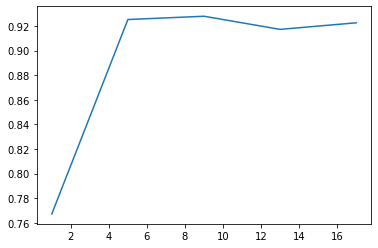

In [47]:
num_leaves = np.linspace(10,110,11,dtype = int)
tree_learner = ["serial","feature","data","voting"]
max_bin = np.linspace(10,500,5,dtype = int)#Optimizing LGBM Parameters.
max_depth = list(np.arange(1,20,4))

list1 = list()
list2 = list()


for i in max_depth :


    lgbm = lgb.LGBMClassifier(learning_rate = 0.2473
                         ,num_iterations = 300
                         ,max_depth = i
                         ,objective = "multiclass"
                         ,metric = "multi_error"
                         ,num_leaves = 100
                         ,max_bin = 255)
    lgbm.fit(X_train
         ,y_train
         ,eval_set = [(X_val,y_val)]
         ,early_stopping_rounds = 100)
    
    list1.append(i)
    list2.append(lgbm.score(X_test,y_test))
    print("Max Deth Value : {} Score : {}".format(i,lgbm.score(X_test,y_test))) 
plt.plot(list1,list2)   


In [72]:
# The best model LGBM Model

lgbm = lgb.LGBMClassifier(learning_rate = 0.2473
                         ,num_iterations = 1000
                         ,max_depth = 8
                         ,objective = "multiclass"
                         ,metric = "multi_error"
                         ,num_leaves = 100
                         ,max_bin = 255)

start = dt.now()
lgbm.fit(X_train_pca
         ,y_train_pca
         ,eval_set = [(X_val_pca,y_val_pca)]
         ,early_stopping_rounds = 100
         ,verbose = False)

running_time_lgbm = (dt.now()-start).seconds
score_lgbm = round(lgbm.score(X_test_pca,y_test_pca),2)
print("The best score with LGBM for PCA Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(lgbm.score(X_test_pca,y_test_pca)*100,2),running_time_lgbm))




start = dt.now()
lgbm.fit(X_train_lda
         ,y_train_lda
         ,eval_set = [(X_val_lda,y_val_lda)]
         ,early_stopping_rounds = 100
         ,verbose = False)

running_time_lgbm = (dt.now()-start).seconds
score_lgbm_lda = round(lgbm.score(X_test_lda,y_test_lda),2)
print("The best score with LGBM for LDA is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(lgbm.score(X_test_lda,y_test_lda)*100,2),running_time_lgbm))


start = dt.now()
lgbm.fit(X_train
         ,y_train
         ,eval_set = [(X_val,y_val)]
         ,early_stopping_rounds = 100
         ,verbose = False)

running_time_lgbm = (dt.now()-start).seconds
score_lgbm = round(lgbm.score(X_test,y_test),2)
print("The best score with LGBM for Raw Data is %{:.2f}\nRunning Time (Seconds) : {:.2f}".format(round(lgbm.score(X_test,y_test)*100,2),running_time_lgbm))

The best score with LGBM for PCA Data is %72.11
Running Time (Seconds) : 7.00
The best score with LGBM for LDA is %81.79
Running Time (Seconds) : 5.00
The best score with LGBM for Raw Data is %93.06
Running Time (Seconds) : 15.00


# MLP Classifier

In [50]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="val accuracy")
    axs[0].set_ylabel("Accuracy")                                             #Plot Function to interpret results.
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="val error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9984      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                3

54/54 [==============================] - 0s 3ms/step - loss: 0.8738 - accuracy: 0.6938 - val_loss: 0.7998 - val_accuracy: 0.7240
Epoch 107/700
54/54 [==============================] - 0s 3ms/step - loss: 0.9132 - accuracy: 0.6724 - val_loss: 0.7423 - val_accuracy: 0.7369
Epoch 108/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8949 - accuracy: 0.6826 - val_loss: 0.7058 - val_accuracy: 0.7516
Epoch 109/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8599 - accuracy: 0.6958 - val_loss: 0.7210 - val_accuracy: 0.7504
Epoch 110/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8790 - accuracy: 0.6935 - val_loss: 0.7122 - val_accuracy: 0.7581
Epoch 111/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8543 - accuracy: 0.6913 - val_loss: 0.7168 - val_accuracy: 0.7516
Epoch 112/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8556 - accuracy: 0.6988 - val_loss: 0.7165 - val_accuracy: 0.7593
Epoch 113/700

54/54 [==============================] - 0s 3ms/step - loss: 0.8334 - accuracy: 0.7017 - val_loss: 0.6898 - val_accuracy: 0.7693
Epoch 221/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.7035 - val_loss: 0.6533 - val_accuracy: 0.7858
Epoch 222/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8214 - accuracy: 0.7123 - val_loss: 0.6759 - val_accuracy: 0.7728
Epoch 223/700
54/54 [==============================] - 0s 4ms/step - loss: 0.8456 - accuracy: 0.7007 - val_loss: 0.6721 - val_accuracy: 0.7699
Epoch 224/700
54/54 [==============================] - 0s 4ms/step - loss: 0.8441 - accuracy: 0.7077 - val_loss: 0.6703 - val_accuracy: 0.7846
Epoch 225/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8412 - accuracy: 0.7024 - val_loss: 0.6599 - val_accuracy: 0.7781
Epoch 226/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8377 - accuracy: 0.7029 - val_loss: 0.7390 - val_accuracy: 0.7446
Epoch 227/700

54/54 [==============================] - 0s 3ms/step - loss: 0.8814 - accuracy: 0.6911 - val_loss: 0.6811 - val_accuracy: 0.7728
Epoch 335/700
54/54 [==============================] - 0s 3ms/step - loss: 0.9068 - accuracy: 0.6861 - val_loss: 0.7152 - val_accuracy: 0.7557
Epoch 336/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8701 - accuracy: 0.6985 - val_loss: 0.6744 - val_accuracy: 0.7758
Epoch 337/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8631 - accuracy: 0.6988 - val_loss: 0.7130 - val_accuracy: 0.7557
Epoch 338/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8822 - accuracy: 0.6952 - val_loss: 0.7316 - val_accuracy: 0.7469
Epoch 339/700
54/54 [==============================] - 0s 4ms/step - loss: 0.8565 - accuracy: 0.7049 - val_loss: 0.6897 - val_accuracy: 0.7781
Epoch 340/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8722 - accuracy: 0.6920 - val_loss: 0.7582 - val_accuracy: 0.7475
Epoch 341/700

54/54 [==============================] - 0s 3ms/step - loss: 0.8527 - accuracy: 0.6949 - val_loss: 0.7008 - val_accuracy: 0.7510
Epoch 449/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8396 - accuracy: 0.6905 - val_loss: 0.6818 - val_accuracy: 0.7622
Epoch 450/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8167 - accuracy: 0.7129 - val_loss: 0.6994 - val_accuracy: 0.7587
Epoch 451/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.7007 - val_loss: 0.6672 - val_accuracy: 0.7722
Epoch 452/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.6980 - val_loss: 0.6825 - val_accuracy: 0.7622
Epoch 453/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8755 - accuracy: 0.6933 - val_loss: 0.6952 - val_accuracy: 0.7610
Epoch 454/700
54/54 [==============================] - 0s 3ms/step - loss: 0.9114 - accuracy: 0.6799 - val_loss: 0.7043 - val_accuracy: 0.7646
Epoch 455/700

Epoch 562/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8077 - accuracy: 0.7204 - val_loss: 0.6743 - val_accuracy: 0.7681
Epoch 563/700
54/54 [==============================] - 0s 4ms/step - loss: 0.8245 - accuracy: 0.7219 - val_loss: 0.6631 - val_accuracy: 0.7663
Epoch 564/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8096 - accuracy: 0.7229 - val_loss: 0.6497 - val_accuracy: 0.7793
Epoch 565/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8042 - accuracy: 0.7085 - val_loss: 0.6324 - val_accuracy: 0.7881
Epoch 566/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8221 - accuracy: 0.7167 - val_loss: 0.6474 - val_accuracy: 0.7858
Epoch 567/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8147 - accuracy: 0.7167 - val_loss: 0.6429 - val_accuracy: 0.7805
Epoch 568/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8102 - accuracy: 0.7141 - val_loss: 0.6547 - val_accuracy: 0.7875

54/54 [==============================] - 0s 3ms/step - loss: 0.8096 - accuracy: 0.7101 - val_loss: 0.6763 - val_accuracy: 0.7587
Epoch 677/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.7110 - val_loss: 0.6378 - val_accuracy: 0.7793
Epoch 678/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8003 - accuracy: 0.7138 - val_loss: 0.6624 - val_accuracy: 0.7710
Epoch 679/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.7147 - val_loss: 0.6552 - val_accuracy: 0.7728
Epoch 680/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8119 - accuracy: 0.7160 - val_loss: 0.6579 - val_accuracy: 0.7775
Epoch 681/700
54/54 [==============================] - 0s 3ms/step - loss: 0.8380 - accuracy: 0.7097 - val_loss: 0.6580 - val_accuracy: 0.7687
Epoch 682/700
54/54 [==============================] - 0s 3ms/step - loss: 0.7943 - accuracy: 0.7222 - val_loss: 0.6406 - val_accuracy: 0.7934
Epoch 683/700

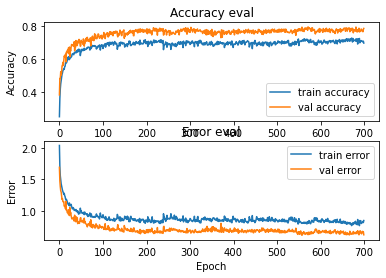

47/47 - 0s - loss: 0.6325 - accuracy: 0.7939 - 57ms/epoch - 1ms/step

Test accuracy: 0.79
Running Time (Seconds) : 123.00


In [51]:
mlp = keras.Sequential([
    keras.layers.Dense(128,input_dim=(X_train.shape[1]),activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32,activation = "relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax')
])

optimiser = keras.optimizers.Adam(learning_rate=0.003)
mlp.compile(optimizer=optimiser,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])


mlp.summary()

start = dt.now()

history = mlp.fit(x = X_train,y =  y_train, validation_data=(X_val, y_val), batch_size=128, epochs=700)

running_time_mlp = (dt.now() - start).seconds

plot_history(history)

test_loss, test_mlp_acc = mlp.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy: {:.2f}\nRunning Time (Seconds) : {:.2f}'.format(test_mlp_acc,running_time_mlp))


# CNN

In [26]:
#Code for extracting mfcc features from raw data.

DATASET_PATH = "C:\\Users\Dell-pc\\Desktop\\Bitirme\\Data\\genres_original"
JSON_PATH = "MFCCs.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def save_mfcc(dataset_path, json_path, num_mfcc=20, n_fft=2048, hop_length=512, num_segments=10):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    scaled=scaler.fit_transform(mfcc)
                    
                    mfcc = scaled.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=15)



Processing: C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00000.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\bl

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00006.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00013.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00019.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00019.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00019.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00020.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00026.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00027.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00032.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00032.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00032.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00032.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00033.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00033.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00033.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00033.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00033.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00033.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00033.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\g

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00039.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00040.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00046.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00046.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00046.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00046.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00046.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00046.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00047.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00047.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00047.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00047.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00047.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00053.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00060.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00061.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00061.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00067.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00073.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00080.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00080.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00080.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00080.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00080.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00081.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00081.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00081.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00081.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00081.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00081.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00087.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00094.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00095.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00095.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\blues\blues.00095.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00001.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_orig

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00007.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00008.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_orig

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00014.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00014.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00014.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00014.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00014.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00014.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00014.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00015.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00015.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00015.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00020.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00021.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_orig

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00027.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00028.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00033.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00033.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00033.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00034.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00034.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00034.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00034.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00034.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00034.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00034.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_or

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00040.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00041.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00041.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00046.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00047.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00047.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00053.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00054.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00054.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00065.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00071.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_or

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00077.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00077.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00078.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_ori

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00084.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00084.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00084.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00084.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00084.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00084.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00084.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00085.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00085.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00085.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00090.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00090.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00090.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00090.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00091.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00091.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00091.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00091.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00091.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00091.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_o

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00097.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00097.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00097.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00097.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00097.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00097.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00098.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00098.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00098.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\classical\classical.00098.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00004.wav, segment:

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00010.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00011.wav, seg

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00016.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00016.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00016.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00017.wav, segmen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00023.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00024.wav, seg

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00030.wav, segment

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00037.wav, segment:

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00043.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00043.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00044.wav, segment

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00050.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00050.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00050.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00050.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00050.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00050.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00050.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00051.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00051.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00051.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00051.wav, seg

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00057.wav, segme

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00064.wav, segment

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00070.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00070.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00070.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00070.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00070.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00070.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00070.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00071.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00071.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00071.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00071.wav, seg

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00077.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00077.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00077.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00078.wav, segmen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00084.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00084.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00084.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00084.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00084.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00084.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00084.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00085.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00085.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00085.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00085.wav, seg

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00091.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00092.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00092.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00092.wav, seg

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00097.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00098.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00098.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\country\country.00098.wav, seg

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00003.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00003.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00003.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00003.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00003.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00004.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00004.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00004.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00004.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00004.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00004.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00010.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00017.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00018.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00018.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00018.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00024.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00024.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00024.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00024.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00024.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00024.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00024.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00025.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00025.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00025.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00025.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00031.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00032.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00032.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00032.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00037.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00037.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00037.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00038.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00045.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00051.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00051.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00052.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00058.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00065.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00065.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00065.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00065.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00065.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00065.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00066.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00066.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00066.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00066.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00066.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00072.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00073.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00073.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00079.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00085.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00085.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00086.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00092.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\disco\disco.00099.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00006.wav, segment:11
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00012.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00012.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00013.wav, segment:9
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00019.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00019.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00019.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00019.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00019.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00020.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00020.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00020.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00020.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00020.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00020.wav, segment:6
C:\Users\Dell-pc

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00026.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00027.wav, segment:1
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00033.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00033.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00033.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00033.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00033.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00033.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00033.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00034.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00034.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00034.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00034.wav, segment:4
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00039.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00039.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00039.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00039.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00039.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00040.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00040.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00040.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00040.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00040.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00040.wav, segment:6
C:\Users\Dell-pc

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00046.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00046.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00046.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00046.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00046.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00047.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00047.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00047.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00047.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00047.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00047.wav, segment:6
C:\Users\Dell-pc

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00053.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00054.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00054.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00054.wav, segment:3
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00060.wav, segment:13
C:\Users\Dell-pc\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00066.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00067.wav, segment:10
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00073.wav, segment:12
C:\Users\Dell-pc\D

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00080.wav, segment:11
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00087.wav, segment:12
C:\Users\Dell-pc\D

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\hiphop\hiphop.00094.wav, segment:11
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00000.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00000.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00000.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00000.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00000.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00000.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00001.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00001.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00001.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00001.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00001.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00007.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00013.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00013.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00013.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00013.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00013.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00013.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00013.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00014.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00014.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00014.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00014.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00020.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jaz

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00034.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00041.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00042.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00042.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00055.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00055.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00055.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00056.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jaz

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00062.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00063.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00063.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00069.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jaz

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00075.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00075.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00075.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00076.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jaz

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00082.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00083.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00083.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00089.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jaz

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00095.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00095.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00095.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00095.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00096.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00096.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00096.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00096.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00096.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00096.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\jazz.00096.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\jazz\ja

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00002.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00002.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00002.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00002.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00002.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00002.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00002.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00003.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00003.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00003.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00003.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00008.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00008.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00009.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00015.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00016.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00022.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00028.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00028.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00028.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00028.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00028.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00029.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00029.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00029.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00029.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00029.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00029.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00034.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00035.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00041.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00041.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00041.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00041.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00041.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00041.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00041.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00042.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00042.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00042.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00042.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00047.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00048.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00055.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00056.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00062.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\ge

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00068.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00068.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00068.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00068.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00068.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00068.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00069.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00069.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00069.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00069.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00069.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00074.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00075.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00082.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00083.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00083.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00089.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00095.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\metal\metal.00096.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\gen

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00003.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00004.wav, segment:

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00010.wav, segment:12
C

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00017.wav, segment:1

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00024.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00024.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00024.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00024.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00024.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00024.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00025.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00025.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00025.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00025.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00025.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00025.wav, segment:

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00031.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00031.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00031.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00031.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00031.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00031.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00031.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00032.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00032.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00032.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00032.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00032.wav, segment:

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00038.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00039.wav, segment:

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00044.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00044.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00045.wav, segment:10
C

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00052.wav, segment:13


C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00059.wav, segment:12
C

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00066.wav, segment:14

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00074.wav, segment:12
C

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00080.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00080.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00080.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00080.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00080.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00080.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00081.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00081.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00081.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00081.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00081.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00081.wav, segment:

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00088.wav, segment:13


C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00095.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00095.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00095.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\pop\pop.00096.wav, segment:9
C

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00002.wav, segment:15
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00009.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00010.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00010.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00010.wav, segment:3
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00015.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00015.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00016.wav, segment:9
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00022.wav, segment:13
C:\Users\Dell-pc\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00028.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00028.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00028.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00028.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00029.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00029.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00029.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00029.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00029.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00029.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00029.wav, segment:7
C:\Users\Dell-pc\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00035.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00035.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00035.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00035.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00035.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00036.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00036.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00036.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00036.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00036.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00036.wav, segment:6
C:\Users\Dell-pc

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00042.wav, segment:11
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00049.wav, segment:13
C:\Users\Dell-pc\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00056.wav, segment:12
C:\Users\Dell-pc\D

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00062.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00063.wav, segment:1
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00068.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00069.wav, segment:10
C:\Users\Dell-pc\De

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00075.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00075.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00075.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00076.wav, segment:8
C:\Users\Dell-pc\D

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00082.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00083.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00083.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00083.wav, segment:3
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00089.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00090.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00090.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00090.wav, segment:3
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00096.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00096.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00096.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00096.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00096.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00096.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00097.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00097.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00097.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00097.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\reggae\reggae.00097.wav, segment:5
C:\Users\Dell-p

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00003.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00003.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00003.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00003.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00003.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00003.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00003.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00004.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00004.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00004.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00004.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00010.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00011.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00016.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00017.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00024.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00024.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00024.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00024.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00024.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00024.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00024.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00025.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00025.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00025.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00025.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00031.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00031.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00031.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00031.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00031.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00031.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00032.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00032.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00032.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00032.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00032.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00038.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\roc

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00044.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00044.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00045.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00051.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00052.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00059.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00065.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00065.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00065.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00065.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00066.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00066.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00066.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00066.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00066.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00066.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00066.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\ro

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00073.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00080.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00081.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00081.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00081.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:6
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:7
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:8
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:9
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00087.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock

C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00094.wav, segment:10
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00094.wav, segment:11
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00094.wav, segment:12
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00094.wav, segment:13
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00094.wav, segment:14
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00094.wav, segment:15
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00095.wav, segment:1
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00095.wav, segment:2
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00095.wav, segment:3
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00095.wav, segment:4
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\rock.00095.wav, segment:5
C:\Users\Dell-pc\Desktop\Bitirme\Data\genres_original\rock\

In [52]:
#Codes related with model preparation

DATA_PATH = "C:\\Users\\Dell-pc\\Desktop\\Bitirme\\MFCCs.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)
    

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    

    
    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())


    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 85, 18, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 43, 9, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 43, 9, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 7, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 4, 32)        0         
 2D)                                                             
                                                      

300/300 [==============================] - 12s 41ms/step - loss: 0.6733 - accuracy: 0.7665 - val_loss: 0.9297 - val_accuracy: 0.6828
Epoch 41/50
300/300 [==============================] - 11s 38ms/step - loss: 0.6503 - accuracy: 0.7751 - val_loss: 0.9424 - val_accuracy: 0.6782
Epoch 42/50
300/300 [==============================] - 12s 40ms/step - loss: 0.6405 - accuracy: 0.7820 - val_loss: 1.0134 - val_accuracy: 0.6590
Epoch 43/50
300/300 [==============================] - 12s 40ms/step - loss: 0.6375 - accuracy: 0.7812 - val_loss: 0.9293 - val_accuracy: 0.6920
Epoch 44/50
300/300 [==============================] - 13s 43ms/step - loss: 0.6198 - accuracy: 0.7901 - val_loss: 0.9344 - val_accuracy: 0.6866
Epoch 45/50
300/300 [==============================] - 13s 43ms/step - loss: 0.6085 - accuracy: 0.7883 - val_loss: 1.0516 - val_accuracy: 0.6477
Epoch 46/50
300/300 [==============================] - 12s 40ms/step - loss: 0.5989 - accuracy: 0.7930 - val_loss: 0.9755 - val_accuracy: 0.67

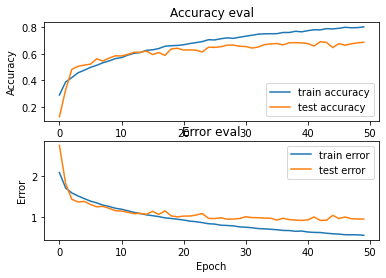

94/94 - 1s - loss: 0.9261 - accuracy: 0.6923 - 1000ms/epoch - 11ms/step

Test accuracy: 0.69
Running Time (Seconds) : 612.00


In [53]:
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.2, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    
    start = dt.now()
    
    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)
    running_time_cnn = (dt.now() - start).seconds
    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_cnn_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy: {:.2f}\nRunning Time (Seconds) : {:.2f}'.format(test_cnn_acc,running_time_cnn))


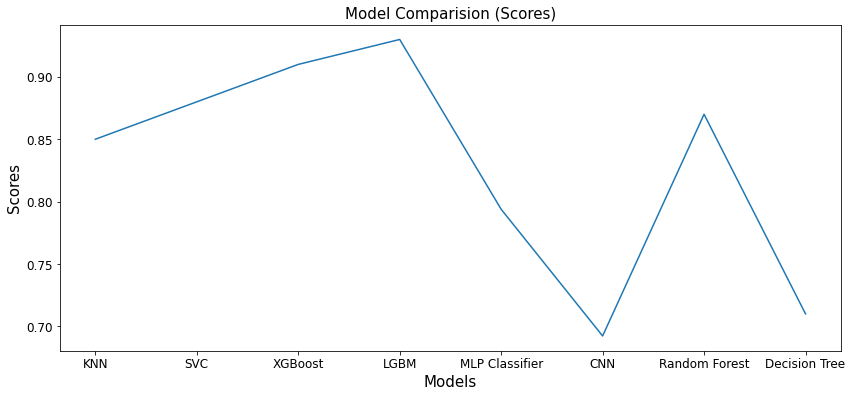

In [54]:
#Model Comparision related to Accuracy Rate.
dictionary = {"KNN" : score_knn
              ,"SVC" : score_svc
              ,"XGBoost" : score_xgb
              ,"LGBM" : score_lgbm
              ,"MLP Classifier" : test_mlp_acc
              ,"CNN" : test_cnn_acc
              ,"Random Forest" : score_rfc
              ,"Decision Tree" : score_dtc}


plt.figure(figsize=(14, 6))
plt.title("Model Comparision (Scores)",fontdict={'fontsize':15})
plt.ylabel("Scores",fontdict={'fontsize':15})
plt.xlabel("Models",fontdict={'fontsize':15})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(dictionary.keys(),dictionary.values())   # The best model is LGBM

<BarContainer object of 8 artists>

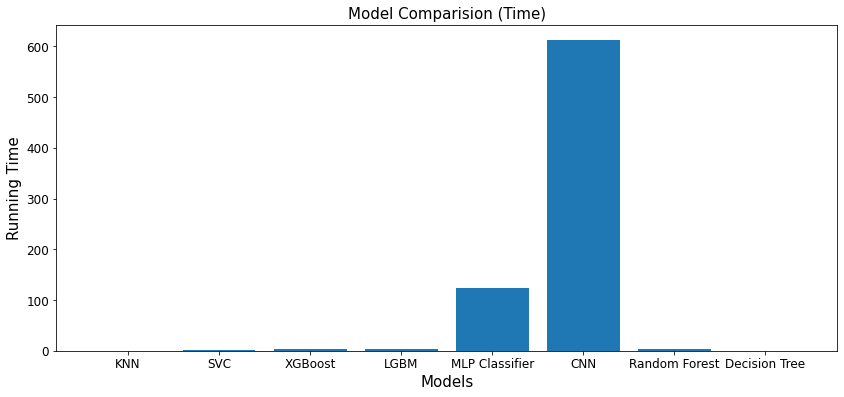

In [55]:
dictionary = {"KNN" : running_time_knn
              ,"SVC" : running_time_svc
              ,"XGBoost" : running_time_xgb
              ,"LGBM" : running_time_lgbm
              ,"MLP Classifier" : running_time_mlp
              ,"CNN" : running_time_cnn
              ,"Random Forest" : running_time_rfc
              ,"Decision Tree" : running_time_dtc}

ax = fig.add_subplot(111)
plt.figure(figsize=(14, 6))
plt.title("Model Comparision (Time)",fontdict={'fontsize':15})
plt.ylabel("Running Time",fontdict={'fontsize':15})
plt.xlabel("Models",fontdict={'fontsize':15})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(dictionary.keys(),dictionary.values())       #Knn's and Decision Tree's runtime is too close to zero that's why it shows as 0.
                                                     # The Best Model According to Time is LGBM.

# Feature Importance

In [73]:
perm = PermutationImportance(estimator=lgbm, random_state=15)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm
                  ,feature_names = X_test.columns.tolist()
                  ,top = 40)

Weight,Feature
0.0810 ± 0.0071,spectral_contrast_var
0.0696 ± 0.0093,y_perc_mean
0.0591 ± 0.0067,lpc_var
0.0567 ± 0.0087,y_perc_var
0.0562 ± 0.0086,spectral_contrast_mean
0.0450 ± 0.0035,y_harm_mean
0.0338 ± 0.0052,melspectrogram_var
0.0318 ± 0.0066,tonnetz_var
0.0236 ± 0.0059,tempo
0.0227 ± 0.0075,rms_var


In [43]:
#Columns which its weight is greater than 0.01, this will increase efficiency
columns4 = ["y_perc_mean","spectral_contrast_var","lpc_var","y_perc_var","spectral_contrast_var","y_harm_mean"
           ,"melspectrogram_var","tonnetz_var","tempo","rms_var","spec_bw_mean","spectral_flatness_mean","chromagram_mean"
           ,"mfcc_var_1","mfcc_var_1","y_harm_var","rollof_var","mfcc_mean_2","mfcc_mean_20","mfcc_mean_20","spec_bw_var"
           ,"tonnetz_mean","chromagram_var","spectral_flatness_var","spectral_centroids_var","mfcc_mean_3","zero_crossings_mean"
           ,"chroma_cqt_var","mfcc_mean_5","tempogram_var","chroma_cqt_mean","mfcc_mean_18","chroma_cens_var","rollof_mean"
           ,"mfcc_mean_17","chroma_cens_mean","mfcc_mean_19","mfcc_mean_11","mfcc_mean_14","mfcc_mean_12","mfcc_mean_6"
           ,"mfcc_mean_16"]

df_X_new= df[columns4]

scaler = MinMaxScaler(feature_range = (0,1)) 
df_X_new = scaler.fit_transform(df_X_new)
df_X_new = pd.DataFrame(df_X_new, columns = columns)         #Scaling features before train_test_split

X_train, X_test, y_train, y_test = train_test_split( df_X_new, df_Y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=15)

print("Train set size : {}\nTest set size : {}\nValidation set size : {}".format(X_train.shape[0],X_test.shape[0],X_val.shape[0]))
print("The Reduced Dimension of train dataset is {}".format(X_train.shape[1]))



Train set size : 6792
Test set size : 1499
Validation set size : 1699
The Reduced Dimension of train dataset is 42


In [40]:
lgbm2 = lgb.LGBMClassifier(learning_rate = 0.2473
                         ,num_iterations = 700
                         ,max_depth = 8
                         ,objective = "multiclass"
                         ,metric = "multi_error"
                         ,num_leaves = 100
                         ,max_bin = 255)
start = dt.now()
lgbm2.fit(X_train
         ,y_train
         ,eval_set = [(X_val,y_val)]
         ,early_stopping_rounds = 50)
running_time_lgbm2 = (dt.now() - start).seconds

print("The score with LGBM is %{}".format(round(lgbm2.score(X_test,y_test)*100)))
print("Accuracy Difference after reducing the dimension :  {:.2f}\nRunning Time Difference after reducing the dimension :  {:.2f}"
      .format(round(lgbm2.score(X_test,y_test),2) - score_lgbm ,round(running_time_lgbm - running_time_lgbm2,2 )))

[1]	valid_0's multi_error: 0.329017
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_error: 0.286639
[3]	valid_0's multi_error: 0.260153
[4]	valid_0's multi_error: 0.246027
[5]	valid_0's multi_error: 0.231901
[6]	valid_0's multi_error: 0.222484
[7]	valid_0's multi_error: 0.214832
[8]	valid_0's multi_error: 0.205415
[9]	valid_0's multi_error: 0.198352
[10]	valid_0's multi_error: 0.195998
[11]	valid_0's multi_error: 0.187758
[12]	valid_0's multi_error: 0.183049
[13]	valid_0's multi_error: 0.17834
[14]	valid_0's multi_error: 0.171277
[15]	valid_0's multi_error: 0.167157
[16]	valid_0's multi_error: 0.164214
[17]	valid_0's multi_error: 0.166569
[18]	valid_0's multi_error: 0.162448
[19]	valid_0's multi_error: 0.161271
[20]	valid_0's multi_error: 0.160094
[21]	valid_0's multi_error: 0.158328
[22]	valid_0's multi_error: 0.148323
[23]	valid_0's multi_error: 0.146557
[24]	valid_0's multi_error: 0.14538
[25]	valid_0's multi_error: 0.145968
[26]	valid_0's multi_erro

# Results

Accuracy : 0.917 



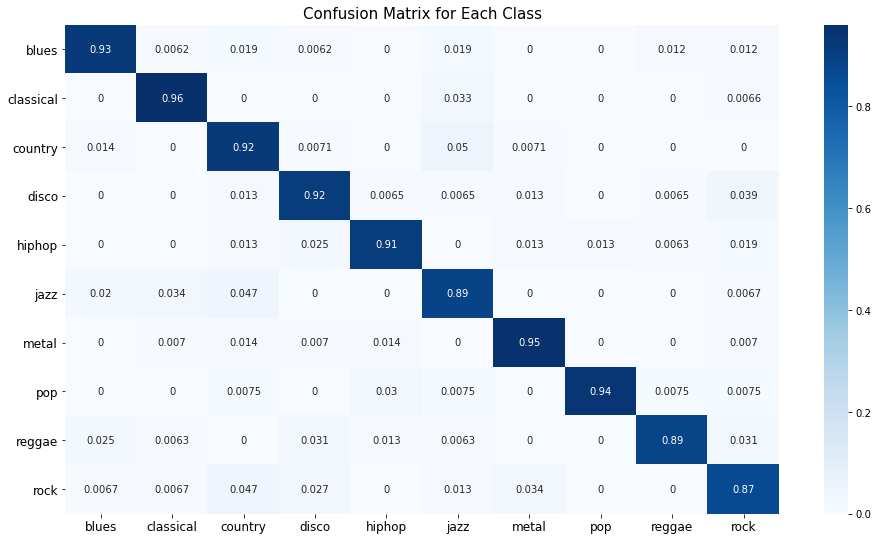

In [41]:
# Final model
preds = lgbm2.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 3), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds,normalize = "true") #normalize = 'true'
plt.figure(figsize = (16, 9))
plt.title("Confusion Matrix for Each Class",fontdict={'fontsize':15})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);


# TEST

In [59]:

mydict = {
               "mfcc_mean_20": [],"mfcc_var_20": [],"spectral_centroids_mean": [],"spectral_centroids_var": [],
"chromagram_mean": [],"chromagram_var": [],"tempo": [],
"zero_crossings_mean": [],"zero_crossings_var": [],"y_harm_mean": [],"y_harm_var": [],"y_perc_mean": [],"y_perc_var": [],
"rollof_mean": [],"rollof_var": [],"rms_mean": [],"rms_var": [],"mfcc_mean_1": [],"mfcc_mean_2": [],"mfcc_mean_3": []
,"mfcc_mean_4": [],"mfcc_mean_5": [],"mfcc_mean_6": [],"mfcc_mean_7": [],"mfcc_mean_8": [],"mfcc_mean_9": []
,"mfcc_mean_10": [],"mfcc_mean_11": [],"mfcc_mean_12": [],"mfcc_mean_13": [],"mfcc_mean_14": [],"mfcc_mean_15": []
,"mfcc_mean_16": [],"mfcc_mean_17": [],"mfcc_mean_18": [],"mfcc_mean_19": [],"mfcc_var_1": [],"mfcc_var_2": [],"mfcc_var_3": []
,"mfcc_var_4": [],"mfcc_var_5": [],"mfcc_var_6": [],"mfcc_var_7": [],"mfcc_var_8": [],"mfcc_var_9": []
,"mfcc_var_10": [],"mfcc_var_11": [],"mfcc_var_12": [],"mfcc_var_13": [],"mfcc_var_14": [],"mfcc_var_15": []
,"mfcc_var_16": [],"mfcc_var_17": [],"mfcc_var_18": [],"mfcc_var_19": [],"spec_bw_mean": [],"spec_bw_var": []
,"lpc_mean": [],"lpc_var": [],"spectral_centroids_max": [],"spectral_centroids_min": [],"chromagram_max": [],
"chromagram_min": [],"y_harm_max": [],"y_harm_min": [],"y_perc_max": [],
"y_perc_min": [],"rollof_max": [],"rollof_min": [],"rms_max": [],"rms_min": [],"lpc_max": [],"lpc_min": [],
"spec_bw_max": [],"spec_bw_min": [],"plp_mean" : [],"plp_min" : [],"plp_max" : [],"plp_var" : [],"tempogram_mean" : []
,"tempogram_var" : [],"tempogram_max" : [],"tempogram_min" : [],"tonnetz_mean" : [],"tonnetz_var" : [],"tonnetz_max" : []
,"tonnetz_min" : [],"poly_features_mean" : [],"poly_features_var" : [],"poly_features_max" : [],"poly_features_min" : []
,"spectral_flatness_mean" : [],"spectral_flatness_var" : [],"spectral_flatness_max" : [],"spectral_flatness_min" : []
,"spectral_contrast_mean" : [],"spectral_contrast_var" : [],"spectral_contrast_max" : [],"spectral_contrast_min" : []
,"melspectrogram_mean" : [],"melspectrogram_var" : [],"melspectrogram_max" : [],"melspectrogram_min" : []
,"chroma_cens_mean" : [],"chroma_cens_max" : [],"chroma_cens_var" : [],"chroma_cens_min" : []
,"chroma_cqt_mean" : [],"chroma_cqt_var" : [],"chroma_cqt_max" : [],"chroma_cqt_min" : []}
    
    
song, sr = librosa.load("C:\\Users\\Dell-pc\\Downloads\\pop.00009.wav")
song, _ = librosa.effects.trim(song)
TOTAL_SAMPLES = song.shape[0]
start_sample = 10*sr
end_sample = start_sample + 30*sr
    
    
mfcc = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=20)
mfcc1 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=1)
mfcc2 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=2)
mfcc3 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=3)
mfcc4 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=4)
mfcc5 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=5)
mfcc6 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=6)
mfcc7 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=7)
mfcc8 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=8)
mfcc9 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=9)
mfcc10 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=10)
mfcc11 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=11)
mfcc12 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=12)
mfcc13 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=13)
mfcc14 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=14)
mfcc15 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=15)
mfcc16 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=16)
mfcc17 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=17)
mfcc18 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=18)
mfcc19 = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=19)
            
            
plp = librosa.beat.plp(y=song[start_sample:end_sample])
tempogram = librosa.feature.tempogram(y=song[start_sample:end_sample]) 
tonnetz = librosa.feature.tonnetz(y=song[start_sample:end_sample])
poly_features = librosa.feature.poly_features(y=song[start_sample:end_sample])
spectral_flatness = librosa.feature.spectral_flatness(y=song[start_sample:end_sample])
spectral_contrast = librosa.feature.spectral_contrast(y=song[start_sample:end_sample])
melspectrogram = librosa.feature.melspectrogram(y=song[start_sample:end_sample])
chroma_cens = librosa.feature.chroma_cens(y=song[start_sample:end_sample],hop_length = 512)
chroma_cqt = librosa.feature.chroma_cqt(y=song[start_sample:end_sample],hop_length = 512)
            
            
            
chromagram = librosa.feature.chroma_stft(y=song[start_sample:end_sample], sr=sr,hop_length = 512)
spectral_centroids = librosa.feature.spectral_centroid(y=song[start_sample:end_sample], sr= sr)
tempo, _ = librosa.beat.beat_track(y=song[start_sample:end_sample], sr = sr)
zero_crossings = librosa.zero_crossings(y=song[start_sample:end_sample], pad=False)
y_harm, y_perc = librosa.effects.hpss(y=song[start_sample:end_sample])
spectral_rolloff = librosa.feature.spectral_rolloff(y=song[start_sample:end_sample], sr=sr)
rms = librosa.feature.rms(y=song[start_sample:end_sample])
spec_bw = librosa.feature.spectral_bandwidth(y=song[start_sample:end_sample], sr=sr)
lpc=librosa.lpc(y=song[start_sample:end_sample], order=16)
    
mydict["mfcc_mean_20"].append(mfcc.mean().tolist())
mydict["mfcc_var_20"].append(mfcc.var().tolist())
            
mydict["plp_mean"].append(plp.mean().tolist())
mydict["plp_var"].append(plp.var().tolist())
mydict["plp_max"].append(plp.max().tolist())
mydict["plp_min"].append(plp.min().tolist())
            
            
mydict["tempogram_mean"].append(tempogram.mean().tolist())
mydict["tempogram_var"].append(tempogram.var().tolist())
mydict["tempogram_max"].append(tempogram.max().tolist())
mydict["tempogram_min"].append(tempogram.min().tolist())
            
            
            
mydict["tonnetz_mean"].append(tonnetz.mean().tolist())
mydict["tonnetz_var"].append(tonnetz.var().tolist())
mydict["tonnetz_max"].append(tonnetz.max().tolist())
mydict["tonnetz_min"].append(tonnetz.min().tolist())
            
            
            
mydict["poly_features_mean"].append(poly_features.mean().tolist())
mydict["poly_features_var"].append(poly_features.var().tolist())
mydict["poly_features_max"].append(poly_features.max().tolist())
mydict["poly_features_min"].append(poly_features.min().tolist())
            
            
            
mydict["spectral_flatness_mean"].append(spectral_flatness.mean().tolist())
mydict["spectral_flatness_var"].append(spectral_flatness.var().tolist())
mydict["spectral_flatness_max"].append(spectral_flatness.max().tolist())
mydict["spectral_flatness_min"].append(spectral_flatness.min().tolist())
            
            
            
mydict["spectral_contrast_mean"].append(spectral_contrast.mean().tolist())
mydict["spectral_contrast_var"].append(spectral_contrast.var().tolist())
mydict["spectral_contrast_max"].append(spectral_contrast.max().tolist())
mydict["spectral_contrast_min"].append(spectral_contrast.min().tolist())
            
            
            
mydict["melspectrogram_mean"].append(melspectrogram.mean().tolist())
mydict["melspectrogram_var"].append(melspectrogram.var().tolist())
mydict["melspectrogram_max"].append(melspectrogram.max().tolist())
mydict["melspectrogram_min"].append(melspectrogram.min().tolist())
            
            
mydict["chroma_cens_mean"].append(chroma_cens.mean().tolist())
mydict["chroma_cens_var"].append(chroma_cens.var().tolist())
mydict["chroma_cens_max"].append(chroma_cens.max().tolist())
mydict["chroma_cens_min"].append(chroma_cens.min().tolist())
            
            
mydict["chroma_cqt_mean"].append(chroma_cqt.mean().tolist())
mydict["chroma_cqt_var"].append(chroma_cqt.var().tolist())
mydict["chroma_cqt_max"].append(chroma_cqt.max().tolist())
mydict["chroma_cqt_min"].append(chroma_cqt.min().tolist())
            
                 
            
mydict["chromagram_mean"].append(chromagram.mean().tolist())
mydict["chromagram_var"].append(chromagram.var().tolist())
mydict["chromagram_max"].append(chromagram.max().tolist())
mydict["chromagram_min"].append(chromagram.min().tolist())
            
mydict["spectral_centroids_mean"].append(spectral_centroids.mean().tolist())
mydict["spectral_centroids_var"].append(spectral_centroids.var().tolist())
mydict["spectral_centroids_max"].append(spectral_centroids.max().tolist())
mydict["spectral_centroids_min"].append(spectral_centroids.min().tolist())
            
            
#mydict["tempo"].append(tempo.tolist())
mydict["tempo"].append(tempo)
            
mydict["zero_crossings_mean"].append(zero_crossings.mean().tolist())
mydict["zero_crossings_var"].append(zero_crossings.var().tolist())
            
mydict["lpc_mean"].append(lpc.mean().tolist())
mydict["lpc_var"].append(lpc.var().tolist())
mydict["lpc_max"].append(lpc.max().tolist())
mydict["lpc_min"].append(lpc.min().tolist())
            
            
mydict["y_harm_mean"].append(y_harm.mean().tolist())
mydict["y_harm_var"].append(y_harm.var().tolist())
mydict["y_harm_max"].append(y_harm.max().tolist())
mydict["y_harm_min"].append(y_harm.min().tolist())
            
mydict["y_perc_mean"].append(y_perc.mean().tolist())
mydict["y_perc_var"].append(y_perc.var().tolist())
mydict["y_perc_max"].append(y_perc.max().tolist())
mydict["y_perc_min"].append(y_perc.min().tolist())
            
            
mydict["rollof_mean"].append(spectral_rolloff.mean().tolist())
mydict["rollof_var"].append(spectral_rolloff.var().tolist())
mydict["rollof_max"].append(spectral_rolloff.max().tolist())
mydict["rollof_min"].append(spectral_rolloff.min().tolist())
            
            
mydict["rms_mean"].append(rms.mean().tolist())
mydict["rms_var"].append(rms.var().tolist())
mydict["rms_max"].append(rms.max().tolist())
mydict["rms_min"].append(rms.min().tolist())
            
            
mydict["spec_bw_mean"].append(spec_bw.mean().tolist())
mydict["spec_bw_var"].append(spec_bw.var().tolist())
mydict["spec_bw_max"].append(spec_bw.max().tolist())
mydict["spec_bw_min"].append(spec_bw.min().tolist())
            
            
mydict["mfcc_mean_1"].append(mfcc1.mean().tolist())
mydict["mfcc_var_1"].append(mfcc1.var().tolist())
            
mydict["mfcc_mean_2"].append(mfcc2.mean().tolist())
mydict["mfcc_var_2"].append(mfcc2.var().tolist())
            
mydict["mfcc_mean_3"].append(mfcc3.mean().tolist())
mydict["mfcc_var_3"].append(mfcc3.var().tolist())
            
mydict["mfcc_mean_4"].append(mfcc4.mean().tolist())
mydict["mfcc_var_4"].append(mfcc4.var().tolist())
            
mydict["mfcc_mean_5"].append(mfcc5.mean().tolist())
mydict["mfcc_var_5"].append(mfcc5.var().tolist())
            
mydict["mfcc_mean_6"].append(mfcc6.mean().tolist())
mydict["mfcc_var_6"].append(mfcc6.var().tolist())
            
mydict["mfcc_mean_7"].append(mfcc7.mean().tolist())
mydict["mfcc_var_7"].append(mfcc7.var().tolist())
            
mydict["mfcc_mean_8"].append(mfcc8.mean().tolist())
mydict["mfcc_var_8"].append(mfcc8.var().tolist())
            
mydict["mfcc_mean_9"].append(mfcc9.mean().tolist())
mydict["mfcc_var_9"].append(mfcc9.var().tolist())
            
mydict["mfcc_mean_10"].append(mfcc10.mean().tolist())
mydict["mfcc_var_10"].append(mfcc10.var().tolist())
        
mydict["mfcc_mean_11"].append(mfcc11.mean().tolist())
mydict["mfcc_var_11"].append(mfcc11.var().tolist())
            
mydict["mfcc_mean_12"].append(mfcc12.mean().tolist())
mydict["mfcc_var_12"].append(mfcc12.var().tolist())
            
mydict["mfcc_mean_13"].append(mfcc13.mean().tolist())
mydict["mfcc_var_13"].append(mfcc13.var().tolist())
            
mydict["mfcc_mean_14"].append(mfcc14.mean().tolist())
mydict["mfcc_var_14"].append(mfcc14.var().tolist())
            
mydict["mfcc_mean_15"].append(mfcc15.mean().tolist())
mydict["mfcc_var_15"].append(mfcc15.var().tolist())
            
mydict["mfcc_mean_16"].append(mfcc16.mean().tolist())
mydict["mfcc_var_16"].append(mfcc16.var().tolist())
            
mydict["mfcc_mean_17"].append(mfcc17.mean().tolist())
mydict["mfcc_var_17"].append(mfcc17.var().tolist())
            
mydict["mfcc_mean_18"].append(mfcc18.mean().tolist())
mydict["mfcc_var_18"].append(mfcc18.var().tolist())
            
mydict["mfcc_mean_19"].append(mfcc19.mean().tolist())
mydict["mfcc_var_19"].append(mfcc19.var().tolist())
    

df_feature = pd.DataFrame(mydict)
df_featurex = df_feature[columns4]
df_new = scaler.transform(df_featurex)
result2 = int(lgbm2.predict(df_new))
    
if result2 == 0:
    print("Blues!")
        
elif result2 == 1:
    print("Classical!")
        
elif result2 == 2:
    print("Country!")
        
elif result2 == 3:
    print("Disco!")
        
        
elif result2 == 4:
    print("Hiphop!")
        
elif result2 == 5:
    print("Jazz!")
        
elif result2 == 6:
    print("Metal!")
        
elif result2 == 7:
    print("Pop!")
        
elif result2 == 8:
    print("Reggae!")
        
elif result2 == 9:
    print("Rock!")
    
    
                
            
    



Pop!
